# <center> Data Mining & Machine Learning for analysing misdemeanours and crimes recorded by the french police and gendarmerie since 1996 </center>

**Auteur** : *Gaspard Jeannerot* <br>
**Temps de réalisation** :<br>
Sur temps libre entre Février - Juin 2020 

**Objectif** : <br>
Dans un premier temps, exploiter des données gouvernementales afin de montrer des tendances, et/ou des évolutions potentielles concernant les crimes et les délits en France. Dans un second temps, développer plusieurs algorithmes d'apprentissage automatique de manière empirique pour prévoir l'apparition des crimes et délits en France.

## Préambule
Après avoir visionné plusieurs vidéos ([première](https://youtu.be/RBQ-IoHfimQ "Partie 1 : Attention la vidéo peut choquer"), [deuxième](https://youtu.be/nKDgFCojiT8 "Partie 2 : Attention la vidéo peut choquer")) concernant la crise des migrants en Europe, j'ai pris conscience que le monde dans lequel nous vivions pouvait très rapidement évoluer. Pire, en essayant de chercher à comprendre ce phénomène et de trouver des causes et des raisons, j'ai rapidement compris qu'un individu comme moi était incapable de pouvoir arranger les choses.

Étant une personne appréciant une vie stable, j'ai essayé de déterminer si "cela" pouvait un jour m'arriver. Puis en prenant du recul sur cette situation, une question m'est survenue : **suis je en danger là où j'habite ?** 

Afin d'apporter des éléments réalistes et concrets, j'ai essayé de chercher quels pouvaient être les facteurs pouvant me mener à une situation ou à un environnement dangereux. Mais avant cela, il m'a fallu comprendre et définir comment évaluer des danger. Dans ce travail, je le définis comme tout acte humain volontaire mettant en péril la sureté (ou stabilité) et pouvant entrainer ou exposer mes proches, mon entourage, à des conséquences préjudiciables.

Pour factuellement déterminer ce "danger", j'ai réfléchi à comment mesurer les actes nuisibles à mon échelle et la réponse a été simple : en analysant les crimes et les délits enregistrés dans mon pays. 

## <center>Table des matières</center>
[1. Préparation des données pour l'analyse](#section1)<br>
&emsp; [1.1. Importations des outils](#section1.1) <br>
&emsp; [1.2. Importations du Jeu de donnée](#section1.2) <br>
&emsp; [1.3. Transposition des données](#section1.3) <br>
&emsp; [1.4. Gestion multiple des feuilles](#section1.4) <br>
&emsp; [1.5. Récupération du champ date](#section1.5) <br>
&emsp; [1.6. Fixation des types de données](#section1.6) <br>
&emsp; [1.7. Colonnes inutilisées](#section1.7) <br>
[2. Analyse du jeu de données](#section2) <br>
&emsp; [2.1. France Métropolitaine](#section2.1) <br>
&emsp; [2.2. Crimes et délit par département](#section2.2) <br>
&emsp; [2.3. Analyse focalisée](#section2.3) <br>
&emsp;&emsp; [2.3.1. Cambriolage](#section2.3.1) <br>
&emsp;&emsp; [2.3.1. Homicides](#section2.3.2) <br>
&emsp;&emsp; [2.3.1. Vols](#section2.3.3) <br>
[3. Machine Learning](#section3) <br>
&emsp; [3.1. Cas d’étude](#section3.1) <br>
&emsp; [3.2. Industrialisation du processus de prédiction](#section3.2) <br>
&emsp; [3.3. Analyse focalisée](#section3.3) <br>
&emsp; [3.4. Prédiction](#section3.4) <br>
[4. Synthèse](#section4) <br>
&emsp; [4.1. Conclusion (SWOT)](#section4.1) <br>
&emsp; [4.2. Bilan](#section4.2) <br>


<a id='section1'></a>
## 1. Préparation des données pour l'analyse / Preparing the data for analysis
Source : <br>
- [Estimation de la population INSEE](https://www.insee.fr/fr/statistiques/1893198)
([Document source](https://www.insee.fr/fr/statistiques/fichier/1893198/estim-pop-dep-sexe-gca-1975-2020.xls))

- [Crimes et délits enregistrés en France](https://www.data.gouv.fr/fr/datasets/chiffres-departementaux-mensuels-relatifs-aux-crimes-et-delits-enregistres-par-les-services-de-police-et-de-gendarmerie-depuis-janvier-1996/)
([Document source](https://www.data.gouv.fr/fr/datasets/r/fdf5afbf-ed3c-4c54-a4f0-3581c8a1eca4))


<a id='section1.1'></a>
### *1.1. Importation des outils / Tools import*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

<a id='section1.2'></a>
### *1.2. Importation du Jeu de donnée / DataSet import*

In [2]:
### Generique variables definition to import
source = 'source/'
xl_misdemeanours_crimes_path = source + 'tableaux-4001-ts.xlsx'
xl_population_path = source + 'estim-pop-dep-sexe-gca-1975-2020.xls'

### Excel file import
crime_xl_data = pd.ExcelFile(xl_misdemeanours_crimes_path)
population_xl_data = pd.ExcelFile(xl_population_path)

### Get a look on sheet pages in the excel
print(crime_xl_data.sheet_names)

['France_Entière', 'France_Métro', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '975', '976', '977', '978', '986', '987', '988']


Le jeu de donnée est composé de plusieurs pages qui peuvent être traitées de manière indépendante. Nous allons nous focaliser sur la feuille "France métropolitaine".

In [3]:
# Define France metropolitaine
current_sheet = crime_xl_data.sheet_names[1]

# Read one sheet to begin ('France_Métro') --> libellée index to write minus two lines
df = pd.read_excel(crime_xl_data, current_sheet, index_col = 'libellé index')

# Examine the head of the DataFrame
df.head(3)

Index  2020_05  2020_04  \
libellé index                                                           
Règlements de compte entre malfaireurs            1        2        4   
Homicides pour voler et à l'occasion de vols      2        4        2   
Homicides pour d'autres motifs                    3       47       55   

                                              2020_03  2020_02  2020_01  \
libellé index                                                             
Règlements de compte entre malfaireurs             14        7        8   
Homicides pour voler et à l'occasion de vols        2        0        1   
Homicides pour d'autres motifs                     49       54       52   

                                              2019_12  2019_11  2019_10  \
libellé index                                                             
Règlements de compte entre malfaireurs              5        5        4   
Homicides pour voler et à l'occasion de vols        3        0        0   
Homicides pour d'autres motifs                     66       70       75   

                                              2019_09  ...  1996_10  1996_09  \
libellé index                                          ...                     
Règlements de compte entre malfaireurs             12  ...        4        7   
Homicides pour voler et à l'occasion de vols        3  ...        9       11   
Homicides pour d'autres motifs                     64  ...       72       56   

                                              1996_08  1996_07  1996_06  \
libellé index                                                             
Règlements de compte entre malfaireurs              9       10        7   
Homicides pour voler et à l'occasion de vols        7       16       12   
Homicides pour d'autres motifs                     62       90       99   

                                              1996_05  1996_04  1996_03  \
libellé index                                                             
Règlements de compte entre malfaireurs              5        6        8   
Homicides pour voler et à l'occasion de vols        6       13       10   
Homicides pour d'autres motifs                     68       72       75   

                                              1996_02  1996_01  
libellé index                                                   
Règlements de compte entre malfaireurs              7        8  
Homicides pour voler et à l'occasion de vols       11       12  
Homicides pour d'autres motifs                     55       69  

[3 rows x 294 columns]

Le jeu de donnée possède des données temporelles en tant que dimensions. Afin de rendre les variables plus exploitables, nous allons opérer à une transformation de transposition. De plus afin de pouvoir faciliter la visualisation de nos prochains graphiques, nous allons aussi en profiter pour dissocier le champ date en années et mois et réindexer le jeu de donnée.

<a id='section1.3'></a>
### *1.3. Transposition des données  / Transpose Data and get date values*

In [4]:
# Drop init 'index' columns, and Transpose Data
df = df.drop(columns=['Index'])
df = df.T
df.head()

libellé index  Règlements de compte entre malfaireurs  \
2020_05                                             2   
2020_04                                             4   
2020_03                                            14   
2020_02                                             7   
2020_01                                             8   

libellé index  Homicides pour voler et à l'occasion de vols  \
2020_05                                                   4   
2020_04                                                   2   
2020_03                                                   2   
2020_02                                                   0   
2020_01                                                   1   

libellé index  Homicides pour d'autres motifs  \
2020_05                                    47   
2020_04                                    55   
2020_03                                    49   
2020_02                                    54   
2020_01                                    52   

libellé index  Tentatives d'homicides pour voler et à l'occasion de vols  \
2020_05                                                        3           
2020_04                                                        3           
2020_03                                                        1           
2020_02                                                        9           
2020_01                                                       12           

libellé index  Tentatives homicides pour d'autres motifs  \
2020_05                                              230   
2020_04                                              178   
2020_03                                              175   
2020_02                                              264   
2020_01                                              249   

libellé index  Coups et blessures volontaires suivis de mort  \
2020_05                                                   10   
2020_04                                                    4   
2020_03                                                   10   
2020_02                                                   11   
2020_01                                                   15   

libellé index  Autres coups et blessures volontaires criminels ou correctionnels  \
2020_05                                                    21670                   
2020_04                                                    15904                   
2020_03                                                    16735                   
2020_02                                                    21430                   
2020_01                                                    23468                   

libellé index  Prises d'otages à l'occasion de vols  \
2020_05                                          10   
2020_04                                           5   
2020_03                                           5   
2020_02                                           8   
2020_01                                          12   

libellé index  Prises d'otages dans un autre but  Sequestrations  ...  \
2020_05                                        9             279  ...   
2020_04                                        2             168  ...   
2020_03                                       10             263  ...   
2020_02                                       18             331  ...   
2020_01                                        9             358  ...   

libellé index  Banqueroutes, abus de biens sociaux et autres délits de société  \
2020_05                                                      102                 
2020_04                                                       42                 
2020_03                                                       64                 
2020_02                                                      102                 
2020_01                                                      142                 

libellé inde

Une fois les données transposées, nous pouvons facilement nous rendre compte que nous avons un problème de typage concernant l'index. Elle n'est pas considérée comme un type datetime. Corrigeons cela. Il va aussi falloir tenir compte du document original et des multiples pages.

<a id='section1.4'></a>
### *1.4. Gestion multiples des feuilles xl crime*

In [5]:
df_all = pd.DataFrame(columns=df.columns.values)
df_all['departement'] = np.nan

all_name_sheet = crime_xl_data.sheet_names
invalid_sheet = ['France_Entière','France_Métro']
all_name_sheet = [e for e in all_name_sheet if e not in invalid_sheet]

for i in all_name_sheet:
    df_tmp = pd.read_excel(crime_xl_data, sheet_name=str(i), index_col = 'libellé index')
    df_tmp = df_tmp.drop(columns=['Index'])
    df_tmp = df_tmp.T
    df_tmp['departement'] = str(i)
    df_all = df_all.append(df_tmp)

df_all.departement = df_all.departement.astype(str)
df_all.head()

libellé index Règlements de compte entre malfaireurs  \
2020_05                                            0   
2020_04                                            0   
2020_03                                            0   
2020_02                                            0   
2020_01                                            0   

libellé index Homicides pour voler et à l'occasion de vols  \
2020_05                                                  0   
2020_04                                                  0   
2020_03                                                  0   
2020_02                                                  0   
2020_01                                                  0   

libellé index Homicides pour d'autres motifs  \
2020_05                                    1   
2020_04                                    0   
2020_03                                    0   
2020_02                                    0   
2020_01                                    0   

libellé index Tentatives d'homicides pour voler et à l'occasion de vols  \
2020_05                                                        0          
2020_04                                                        0          
2020_03                                                        0          
2020_02                                                        0          
2020_01                                                        0          

libellé index Tentatives homicides pour d'autres motifs  \
2020_05                                               0   
2020_04                                               3   
2020_03                                               0   
2020_02                                               0   
2020_01                                               0   

libellé index Coups et blessures volontaires suivis de mort  \
2020_05                                                   0   
2020_04                                                   0   
2020_03                                                   1   
2020_02                                                   1   
2020_01                                                   0   

libellé index Autres coups et blessures volontaires criminels ou correctionnels  \
2020_05                                                      135                  
2020_04                                                      131                  
2020_03                                                      107                  
2020_02                                                      123                  
2020_01                                                      134                  

libellé index Prises d'otages à l'occasion de vols  \
2020_05                                          0   
2020_04                                          0   
2020_03                                          0   
2020_02                                          1   
2020_01                                          0   

libellé index Prises d'otages dans un autre but Sequestrations  ...  \
2020_05                                       0              2  ...   
2020_04                                       0              1  ...   
2020_03                                       0              2  ...   
2020_02                                       0              2  ...   
2020_01                                       0              1  ...   

libellé index Index non utilisé Index non utilisé  \
2020_05                       0                 0   
2020_04                       0                 0   
2020_03                       0                 0   
2020_02                       0                 0   
2020_01                       0                 0   

libellé index Prix illicittes, publicité fausse et infractions aux règles de la concurrence  \
2020_05                                                        3                              
2020_04                                                 

<a id='section1.5'></a>
### *1.5. Récupération du champ date*

Mettons à jour l'index du jeu de donnée pour qu'il puisse correspondre au type Datetime. Cela permettra de faciliter sa visualisation plus tard.

#### *1.5.1. Sur une feuille*

In [6]:
# Sur le jeu de donnée France métropolitaine
# Reset index, Get Year, Get Month
df = df.reset_index()
df['year'] = df['index'].astype(str).str[0:4]
df['month'] = df['index'].astype(str).str[5:7]

# Define new date column
combined = df.year.str.cat(df.month,sep=' ')
df['date'] = pd.to_datetime(combined)

# Drop 'index' column and set new index on date
df = df.drop(columns='index')
df = df.set_index('date')

df.head()

libellé index  Règlements de compte entre malfaireurs  \
date                                                    
2020-05-01                                          2   
2020-04-01                                          4   
2020-03-01                                         14   
2020-02-01                                          7   
2020-01-01                                          8   

libellé index  Homicides pour voler et à l'occasion de vols  \
date                                                          
2020-05-01                                                4   
2020-04-01                                                2   
2020-03-01                                                2   
2020-02-01                                                0   
2020-01-01                                                1   

libellé index  Homicides pour d'autres motifs  \
date                                            
2020-05-01                                 47   
2020-04-01                                 55   
2020-03-01                                 49   
2020-02-01                                 54   
2020-01-01                                 52   

libellé index  Tentatives d'homicides pour voler et à l'occasion de vols  \
date                                                                       
2020-05-01                                                     3           
2020-04-01                                                     3           
2020-03-01                                                     1           
2020-02-01                                                     9           
2020-01-01                                                    12           

libellé index  Tentatives homicides pour d'autres motifs  \
date                                                       
2020-05-01                                           230   
2020-04-01                                           178   
2020-03-01                                           175   
2020-02-01                                           264   
2020-01-01                                           249   

libellé index  Coups et blessures volontaires suivis de mort  \
date                                                           
2020-05-01                                                10   
2020-04-01                                                 4   
2020-03-01                                                10   
2020-02-01                                                11   
2020-01-01                                                15   

libellé index  Autres coups et blessures volontaires criminels ou correctionnels  \
date                                                                               
2020-05-01                                                 21670                   
2020-04-01                                                 15904                   
2020-03-01                                                 16735                   
2020-02-01                                                 21430                   
2020-01-01                                                 23468                   

libellé index  Prises d'otages à l'occasion de vols  \
date                                                  
2020-05-01                                       10   
2020-04-01                                        5   
2020-03-01                                        5   
2020-02-01                                        8   
2020-01-01                                       12   

libellé index  Prises d'otages dans un autre but  Sequestrations  ...  \
date                                                              ...   
2020-05-01                                     9             279  ...   
2020-04-01                                     2             168  ...   
2020-03-01                                    10             263  ...   
2020-02-01                                    18             331  ...  

#### *1.5.2. Sur toutes les feuilles*

In [7]:
# Sur le jeu de donnée complet
# Reset index, Get Year, Get Month
df_all = df_all.reset_index()
df_all['year'] = df_all['index'].astype(str).str[0:4]
df_all['month'] = df_all['index'].astype(str).str[5:7]

# Define new date column
combined = df_all.year.str.cat(df_all.month,sep=' ')
df_all['date'] = pd.to_datetime(combined)

# Drop 'index' column and set new index on date
df_all = df_all.drop(columns='index')
df_all = df_all.set_index('date')

df_all.head()

libellé index Règlements de compte entre malfaireurs  \
date                                                   
2020-05-01                                         0   
2020-04-01                                         0   
2020-03-01                                         0   
2020-02-01                                         0   
2020-01-01                                         0   

libellé index Homicides pour voler et à l'occasion de vols  \
date                                                         
2020-05-01                                               0   
2020-04-01                                               0   
2020-03-01                                               0   
2020-02-01                                               0   
2020-01-01                                               0   

libellé index Homicides pour d'autres motifs  \
date                                           
2020-05-01                                 1   
2020-04-01                                 0   
2020-03-01                                 0   
2020-02-01                                 0   
2020-01-01                                 0   

libellé index Tentatives d'homicides pour voler et à l'occasion de vols  \
date                                                                      
2020-05-01                                                     0          
2020-04-01                                                     0          
2020-03-01                                                     0          
2020-02-01                                                     0          
2020-01-01                                                     0          

libellé index Tentatives homicides pour d'autres motifs  \
date                                                      
2020-05-01                                            0   
2020-04-01                                            3   
2020-03-01                                            0   
2020-02-01                                            0   
2020-01-01                                            0   

libellé index Coups et blessures volontaires suivis de mort  \
date                                                          
2020-05-01                                                0   
2020-04-01                                                0   
2020-03-01                                                1   
2020-02-01                                                1   
2020-01-01                                                0   

libellé index Autres coups et blessures volontaires criminels ou correctionnels  \
date                                                                              
2020-05-01                                                   135                  
2020-04-01                                                   131                  
2020-03-01                                                   107                  
2020-02-01                                                   123                  
2020-01-01                                                   134                  

libellé index Prises d'otages à l'occasion de vols  \
date                                                 
2020-05-01                                       0   
2020-04-01                                       0   
2020-03-01                                       0   
2020-02-01                                       1   
2020-01-01                                       0   

libellé index Prises d'otages dans un autre but Sequestrations  ...  \
date                                                            ...   
2020-05-01                                    0              2  ...   
2020-04-01                                    0              1  ...   
2020-03-01                                    0              2  ...   
2020-02-01                                    0              2  ...   
2020-01-01                                    0              1  ..

Le champ date est maintenant l'index. Voyons maintenant les types de données. <br>
<a id='section1.6'></a>
### *1.6. Fixation des types de données / Fixing a data type*

Regardons si plusieurs colonnes ne possèderaient pas un typage non conventionnel ou potentiellement inapproprié pour notre analyse.

In [8]:
df.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
      

In [9]:
df.dtypes

libellé index
Règlements de compte entre malfaireurs                        int64
Homicides pour voler et à l'occasion de vols                  int64
Homicides pour d'autres motifs                                int64
Tentatives d'homicides pour voler et à l'occasion de vols     int64
Tentatives homicides pour d'autres motifs                     int64
                                                              ...  
Fraudes fiscales                                              int64
Autres délits économiques et financiers                       int64
Autres délits                                                 int64
year                                                         object
month                                                        object
Length: 109, dtype: object

Fixons les types des champs 'year' et 'month'

In [10]:
df.year = df.year.astype(str).astype(int)
df.month = df.month.astype(str)

En regardant de plus près, nous pouvons constater que plusieurs colonnes se nomment 'index non utilisé', penchons-nous dessus.

<a id='section1.7'></a>
### *1.7. Colonnes inutilisées*

In [11]:
# Define names of index and columns
df.index.names = ['index']
df.columns.names = ['libellé columns']

df['Index non utilisé'].sum()

libellé columns
Index non utilisé    0
Index non utilisé    2
Index non utilisé    0
Index non utilisé    0
dtype: int64

En visualisant ces résultats, nous pouvons constater que ces dimensions nommées 'Index non utilisé' ne représentent pas une grande quantité d'information. Aussi nous n'allons pas en tenir compte.

In [12]:
print(df.shape)
df_all = df_all.drop(columns='Index non utilisé')
df = df.drop(columns='Index non utilisé')
print(df.shape)

(293, 109)
(293, 105)


Les manipulations de bases ont été réalisées, nous pouvons donc démarrer notre analyse.

<a id='section2'></a>
## 2. Analyse du jeu de données / data analyse
Intéressons-nous au jeu de données du point de vue macro.

In [13]:
# Examine the shape of the DataFrame
print(df.shape)

# Count the number of missing values in each column
print(df.isnull().sum().values)

(293, 105)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Le jeu de donnée est composé de 289 observations pour 105 dimensions. Aucune valeur null ou manquante n’est répertoriée. C'est bien, nous n'allons pas avoir besoin d'effectuer une manipulation de traitements les concernant.

Le jeu de donnée dispose de libellés très explicites. Les voici :

In [14]:
print(df.columns.values)

['Règlements de compte entre malfaireurs'
 "Homicides pour voler et à l'occasion de vols"
 "Homicides pour d'autres motifs"
 "Tentatives d'homicides pour voler et à l'occasion de vols"
 "Tentatives homicides pour d'autres motifs"
 'Coups et blessures volontaires suivis de mort'
 'Autres coups et blessures volontaires criminels ou correctionnels'
 "Prises d'otages à l'occasion de vols"
 "Prises d'otages dans un autre but" 'Sequestrations'
 'Menaces ou chantages pour extorsion de fonds'
 'Menaces ou chantages dans un autre but'
 'Atteintes à la dignité et à la personnalité' 'Violations de domicile'
 'Vols à main armée contre des établissements financiers'
 'Vols à main armée contre des éts industriels ou commerciaux'
 'Vols à main armée contre des entreprises de transports de fonds'
 'Vols à main armée contre des particuliers à leur domicile'
 'Autres vols à main armée'
 'Vols avec armes blanches contre des établissements financiers,commerciaux ou industriels'
 'Vols avec armes blanches 

Ces informations nous permettent de comprendre que ce jeu de donnée regroupe principalement des incidents (crimes ou délits) agrégés par mois d'activité. Aussi pour améliorer notre étude, nous renforçons-le en ajoutant des données concernant la population française.

<a id='section2.1'></a>
### *2.1. France Métropolitaine*
Le jeu de donnée **population_xl_data** est une estimation de la population française diversifiée par les départements, les années ainsi que le sexe des individus. Il va nous permettre par croisement d'apporter des indications complémentaires sur les actes criminels en France.

<a id='section2.1.1'></a>
#### *2.1.1. Description élémentaire*

In [15]:
# Chargement de XL en Dataframe
df_population = pd.read_excel(population_xl_data, '2020', header = 4, index='Départements')
# Nettoyage du jeu de données
df_population.rename(columns={'Unnamed: 0':'Departement','Total.1':'Total Homme','Total.2':'Total Femme'}, inplace=True)

# Suppresion des lignes indésirables
df_population = df_population.drop([96, 102, 103, 104, 105])

valid_population_columns = ['Departement', 'Total','Total Homme','Total Femme']

# Finition sur le DataFrame
df_population = df_population[valid_population_columns]
df_population.head()

Departement     Total  Total Homme  Total Femme
0          01  656955.0     323345.0     333610.0
1          02  526050.0     256977.0     269073.0
2          03  331315.0     158212.0     173103.0
3          04  165197.0      80612.0      84585.0
4          05  141756.0      69231.0      72525.0

In [16]:
total_population_france_metropolitaine = df_population.loc[:96,'Total'].sum()
total_population_dom = df_population.loc[96:,'Total'].sum()
total_population_france_metropolitaine_dom = df_population.loc[:,'Total'].sum()

# En 2020
print("La population de la France métropolitaine est estimée à " + str(int(total_population_france_metropolitaine)) + " individus.")
print("La population des DOMs est estimée à " + str(int(total_population_dom)) + " individus.")
print("La population de la France métropolitaine et des DOMs est estimée à " + str(int(total_population_france_metropolitaine_dom)) + " individus.")

La population de la France métropolitaine est estimée à 64897954 individus.
La population des DOMs est estimée à 2165749 individus.
La population de la France métropolitaine et des DOMs est estimée à 67063703 individus.


In [17]:
df_population['% Population Métropolitaine'] = round(df_population.Total / total_population_france_metropolitaine_dom * 100, 2)

print("Vérification % data : " + str(round(df_population['% Population Métropolitaine'].sum(), 2)))
df_population.head()

Vérification % data : 99.99


Departement     Total  Total Homme  Total Femme  % Population Métropolitaine
0          01  656955.0     323345.0     333610.0                         0.98
1          02  526050.0     256977.0     269073.0                         0.78
2          03  331315.0     158212.0     173103.0                         0.49
3          04  165197.0      80612.0      84585.0                         0.25
4          05  141756.0      69231.0      72525.0                         0.21

Nous disposons maintenant d'un second dataframe nous permettant de connaitre la part de la population pour chaque département. Reprenons l'analyse de notre jeu de donnée initial.

In [18]:
round(df.describe(), 2)

libellé columns  Règlements de compte entre malfaireurs  \
count                                            293.00   
mean                                               6.57   
std                                                3.70   
min                                                0.00   
25%                                                4.00   
50%                                                6.00   
75%                                                9.00   
max                                               22.00   

libellé columns  Homicides pour voler et à l'occasion de vols  \
count                                                  293.00   
mean                                                     3.68   
std                                                      3.00   
min                                                      0.00   
25%                                                      2.00   
50%                                                      3.00   
75%                                                      5.00   
max                                                     16.00   

libellé columns  Homicides pour d'autres motifs  \
count                                    293.00   
mean                                      57.30   
std                                       15.71   
min                                       29.00   
25%                                       47.00   
50%                                       55.00   
75%                                       65.00   
max                                      170.00   

libellé columns  Tentatives d'homicides pour voler et à l'occasion de vols  \
count                                                       293.00           
mean                                                          6.96           
std                                                           4.34           
min                                                           0.00           
25%                                                           4.00           
50%                                                           6.00           
75%                                                           9.00           
max                                                          26.00           

libellé columns  Tentatives homicides pour d'autres motifs  \
count                                               293.00   
mean                                                110.59   
std                                                  45.28   
min                                                  50.00   
25%                                                  82.00   
50%                                                  93.00   
75%                                                 124.00   
max                                                 264.00   

libellé columns  Coups et blessures volontaires suivis de mort  \
count                                                   293.00   
mean                                                     14.52   
std                                                       6.23   
min                                                       3.00   
25%                                                      10.00   
50%                                                      14.00   
75%                                                      18.00   
max                                                      42.00   

libellé columns  Autres coups et blessures volontaires criminels ou correctionnels  \
count                                                       293.00                   
mean                                                      13754.66                   
std                                                        4492.70                   
min                                                        4989.00                   
25%                                                        9909.00                   
50%                                              

<a id='section2.1.2'></a>
#### *2.1.2. Relation et corrélation*

L'analyse des corrélations d'un jeu de donnée est toujours intéressante. Elle permet généralement de distinguer assez facilement quelles sont les variables pour lesquelles, il existe des corrélations positives ou négatives. Toutefois, il est toujours bon de rappeler que corrélation ne signifie pas causalité.

In [19]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

L'analyse de cette matrice de corrélation est assez lourde. Nous pouvons voir de nombreuses corrélations positives et négatives sur différentes variables. Certaines peuvent sembler être liées, par exemple les "Sequestrations" sont très fortement corrélées avec les "Tentatives homicides pour d'autres motifs" ou encore les "Viols sur des majeur(e)s". Tandis que d'autres paraissent surprenantes, "Destructions, cruautés et autres délits envers les animaux" est aussi très fortement corrélé avec les "Violations de domicile".

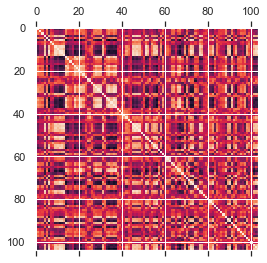

In [20]:
# Vision globale
plt.matshow(df.corr())
plt.show()

En regardant un point de vue global, nous pouvons facilement constater que des "clusters" de corrélation positive et négative semblent se dégager de cette matrice. En nous y intéressant de plus près, nous pouvons constater qu'une partie de ces cluster varie conjointement et nous pouvons supposer que ces variations peuvent dépendre de périodes temporelles tels que les saisons ou les mois encore.

<a id='section2.1.3'></a>
#### *2.1.3. Vision globale*

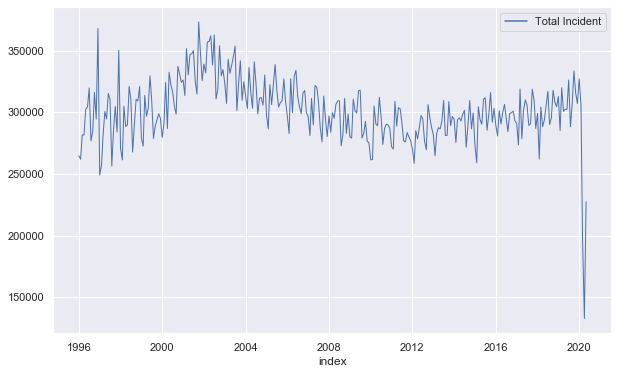

In [21]:
column_to_analyse = df_all.columns.values

# Enlever le département dans les colones à analyse
# Delete num departement
column_to_analyse = np.delete(column_to_analyse,-3)
# delete month
column_to_analyse = np.delete(column_to_analyse,-1)
# delte year
column_to_sum = np.delete(column_to_analyse,-1)


df_france=df.loc[:,column_to_sum]

df_france["Total Incident"] = df_france[column_to_sum].sum(axis=1)
df_france = df_france.drop(columns=column_to_sum)
df_france.head(5)

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_france, ax=ax, ci=int, linewidth=1);

Le nombre total d'incident à chuter début 2020. Dans l'ensemble, la description des données de manière gloable est difficile à interpréter. Aussi nous allons nous focaliser sur plusieurs axes clés. Mais avant regardons comment se comportent ces crimes et délits par département.

<a id='section2.2'></a>
### *2.2. Crime et délit par département*
Regardons  la part des crimes et des délits vis-à-vis de leurs zones géographiques. Pour cela, nous allons consolider notre jeu de données avec les informations correspondantes.

In [22]:
column_to_analyse = df_all.columns.values

# Enlever le département dans les colones à analyse
# Delete num departement
column_to_analyse = np.delete(column_to_analyse,-3)
# delete month
column_to_analyse = np.delete(column_to_analyse,-1)

# Validation du typage dans ce df
df_all[column_to_analyse] = df_all[column_to_analyse].astype(int)
df_all.departement = df_all.departement.astype(str)

In [23]:
df_all['total_incidents'] = df_all[column_to_analyse].sum(axis=1)
df_all.head()

libellé index  Règlements de compte entre malfaireurs  \
date                                                    
2020-05-01                                          0   
2020-04-01                                          0   
2020-03-01                                          0   
2020-02-01                                          0   
2020-01-01                                          0   

libellé index  Homicides pour voler et à l'occasion de vols  \
date                                                          
2020-05-01                                                0   
2020-04-01                                                0   
2020-03-01                                                0   
2020-02-01                                                0   
2020-01-01                                                0   

libellé index  Homicides pour d'autres motifs  \
date                                            
2020-05-01                                  1   
2020-04-01                                  0   
2020-03-01                                  0   
2020-02-01                                  0   
2020-01-01                                  0   

libellé index  Tentatives d'homicides pour voler et à l'occasion de vols  \
date                                                                       
2020-05-01                                                     0           
2020-04-01                                                     0           
2020-03-01                                                     0           
2020-02-01                                                     0           
2020-01-01                                                     0           

libellé index  Tentatives homicides pour d'autres motifs  \
date                                                       
2020-05-01                                             0   
2020-04-01                                             3   
2020-03-01                                             0   
2020-02-01                                             0   
2020-01-01                                             0   

libellé index  Coups et blessures volontaires suivis de mort  \
date                                                           
2020-05-01                                                 0   
2020-04-01                                                 0   
2020-03-01                                                 1   
2020-02-01                                                 1   
2020-01-01                                                 0   

libellé index  Autres coups et blessures volontaires criminels ou correctionnels  \
date                                                                               
2020-05-01                                                   135                   
2020-04-01                                                   131                   
2020-03-01                                                   107                   
2020-02-01                                                   123                   
2020-01-01                                                   134                   

libellé index  Prises d'otages à l'occasion de vols  \
date                                                  
2020-05-01                                        0   
2020-04-01                                        0   
2020-03-01                                        0   
2020-02-01                                        1   
2020-01-01                                        0   

libellé index  Prises d'otages dans un autre but  Sequestrations  ...  \
date                                                              ...   
2020-05-01                                     0               2  ...   
2020-04-01                                     0               1  ...   
2020-03-01                                     0               2  ...   
2020-02-01                                     0               2  ...  

Le jeu de donnée est maintenant utilisable. Regardons une description du nombre de crime et délit commis par département.

In [24]:
df_all.groupby('departement').total_incidents.describe().head()

count         mean         std     min     25%     50%     75%  \
departement                                                                   
01           293.0  3961.614334  291.538805  2671.0  3796.0  3989.0  4135.0   
02           293.0  4089.730375  262.179339  3145.0  3957.0  4079.0  4212.0   
03           293.0  3096.085324  153.718619  2715.0  3003.0  3089.0  3170.0   
04           293.0  2639.870307  107.498631  2357.0  2572.0  2634.0  2707.0   
05           293.0  2524.709898   94.368600  2261.0  2456.0  2522.0  2583.0   

                max  
departement          
01           4820.0  
02           6465.0  
03           4177.0  
04           3079.0  
05           2834.0

In [25]:
mean = round((df_all.groupby('departement').total_incidents.mean().values).mean(),2)
print("Moyenne : " + str(mean))
print("Moyenne x 3 : " + str(mean*3))
print("Moyenne / 3 : " + str(mean/3))

Moyenne : 4933.76
Moyenne x 3 : 14801.28
Moyenne / 3 : 1644.5866666666668


Depuis 1996, nous pouvons constater qu'en France par département et par mois, il y a en moyenne 4945 incidents.

Les limites supérieures à notre analyse vont être égales à 3 fois plus et 3 fois moins la valeur moyenne. Elles correspondent ainsi à 14 835 (limite haute) et 1 648 (limite basse) d'incidents.

In [26]:
moyenne = round(df_all.groupby('departement').total_incidents.mean(), 2).values
departement = df_all.groupby('departement').total_incidents.mean().keys()

df_mean_departement = pd.DataFrame({'Moyenne':moyenne})
df_mean_departement = df_mean_departement.set_index(departement)

print("Moyenne d'acte criminel/délit par mois par département")

df_mean_departement = df_mean_departement.sort_values(by='Moyenne', ascending=True)
print(df_mean_departement.head())
df_mean_departement = df_mean_departement.sort_values(by='Moyenne', ascending=False)
print(df_mean_departement.head())

Moyenne d'acte criminel/délit par mois par département
             Moyenne
departement         
975          2018.64
986          2023.99
977          2049.57
48           2182.69
23           2255.66
              Moyenne
departement          
75           24377.22
13           16227.19
59           16144.00
93           13394.32
69           12865.32


In [27]:
print("Departement avec nb incidents supérieur à la limite haute : ")
print(df_mean_departement[df_mean_departement['Moyenne'] > (mean*3)])
print("Departement avec nb incidents inférieur à la limite basse : ")
print(df_mean_departement[df_mean_departement['Moyenne'] < (mean/3)].values)

# Nombre d'incidents total en fm sur l'année 2019
year = df_all.groupby('year').total_incidents.sum()
print("\nNombre d'incidents sur l'année 2019 : " + str(year[2019]))

# Nombre d'incidents total par département sur l'année 2019
year = df_all.groupby(['year','departement']).total_incidents.sum()
year[2019].head()

Departement avec nb incidents supérieur à la limite haute : 
              Moyenne
departement          
75           24377.22
13           16227.19
59           16144.00
Departement avec nb incidents inférieur à la limite basse : 
[]

Nombre d'incidents sur l'année 2019 : 6428563


departement
01    52059
02    50805
03    38668
04    33059
05    30363
Name: total_incidents, dtype: int64

Au vu du nombre d'incidents constaté, nous pouvons supposé que les 3 départements 75, 13 et 59 peuvent être assimilé à des zones plus à risques car avec un nombre d'incidents supérieur à la limite du nombre d'incidents préétabli. Mais pour avoir une vision plus réalisée, regardons le pourcentage d'incident par individu (à savoir par habitant) en fonction des départements.

In [28]:
df_tmp = df_population.merge(year[2019], left_on='Departement', right_on='departement')
df_tmp.head()

Departement     Total  Total Homme  Total Femme  \
0          01  656955.0     323345.0     333610.0   
1          02  526050.0     256977.0     269073.0   
2          03  331315.0     158212.0     173103.0   
3          04  165197.0      80612.0      84585.0   
4          05  141756.0      69231.0      72525.0   

   % Population Métropolitaine  total_incidents  
0                         0.98            52059  
1                         0.78            50805  
2                         0.49            38668  
3                         0.25            33059  
4                         0.21            30363

In [29]:
df_tmp["% Incident / Personne"] = round(df_tmp["total_incidents"] / df_tmp["Total"] * 100, 2)
df_tmp.head()

Departement     Total  Total Homme  Total Femme  \
0          01  656955.0     323345.0     333610.0   
1          02  526050.0     256977.0     269073.0   
2          03  331315.0     158212.0     173103.0   
3          04  165197.0      80612.0      84585.0   
4          05  141756.0      69231.0      72525.0   

   % Population Métropolitaine  total_incidents  % Incident / Personne  
0                         0.98            52059                   7.92  
1                         0.78            50805                   9.66  
2                         0.49            38668                  11.67  
3                         0.25            33059                  20.01  
4                         0.21            30363                  21.42

In [30]:
df_tmp = df_tmp.sort_values(by='% Incident / Personne', ascending=True)
df_tmp.head(10)

Departement      Total  Total Homme  Total Femme  \
35          35  1082073.0     528036.0     554037.0   
67          67  1132607.0     549793.0     582814.0   
57          57  1035866.0     506327.0     529539.0   
62          62  1452778.0     704417.0     748361.0   
29          29   906554.0     440651.0     465903.0   
49          49   815881.0     397709.0     418172.0   
85          85   683187.0     332346.0     350841.0   
56          56   755566.0     365360.0     390206.0   
91          91  1319401.0     645457.0     673944.0   
78          78  1448625.0     702875.0     745750.0   

    % Population Métropolitaine  total_incidents  % Incident / Personne  
35                         1.61            68489                   6.33  
67                         1.69            74779                   6.60  
57                         1.54            68927                   6.65  
62                         2.17            98796                   6.80  
29                         1.35            61770                   6.81  
49                         1.22            56068                   6.87  
85                         1.02            48066                   7.04  
56                         1.13            53620                   7.10  
91                         1.97            95245                   7.22  
78                         2.16           105888                   7.31

In [31]:
df_tmp = df_tmp.sort_values(by='% Incident / Personne', ascending=False)
df_tmp.head(10)

Departement     Total  Total Homme  Total Femme  \
48          48   76286.0      37808.0      38478.0   
23          23  116270.0      56492.0      59778.0   
90          90  140145.0      69302.0      70843.0   
4           05  141756.0      69231.0      72525.0   
8           09  152398.0      74721.0      77677.0   
14          15  142811.0      69824.0      72987.0   
3           04  165197.0      80612.0      84585.0   
19          2A  162421.0      78523.0      83898.0   
52          52  169250.0      82702.0      86548.0   
46          46  173166.0      83828.0      89338.0   

    % Population Métropolitaine  total_incidents  % Incident / Personne  
48                         0.11            26731                  35.04  
23                         0.17            28380                  24.41  
90                         0.21            30430                  21.71  
4                          0.21            30363                  21.42  
8                          0.23            30924                  20.29  
14                         0.21            28781                  20.15  
3                          0.25            33059                  20.01  
19                         0.24            31262                  19.25  
52                         0.25            32243                  19.05  
46                         0.26            30832                  17.80

En réalisant ces quelques transformations, nous disposons maintenant du taux en pourcentage théorique du nombre d'incidents par personne en fonction des départements. Ce pourcentage permet de visualiser en fonction du nombre de personnes les départements les plus enclins à être source d'incidents. Toutefois, ces chiffres ne prennent pas en compte des cas réalistes où par exemple un individu serait à l'origine de plusieurs incidents.

<a id='section2.3'></a>
### *2.3. Analyse focalisée / Focalisation analysis*
Afin de faciliter l'analyse de ce jeu de donnée, définissons plusieurs pistes d'actes criminels dans notre évaluation. Nous allons étudier les cambriolages, les homicides et les vols.

<a id='section2.3.1'></a>
#### *2.3.1. Cambriolage / Burglary*
Commençons par l'axe cambriolage. Reprenons donc la partie description élémentaire précédemment vue.

In [32]:
# Crimes and mesdemeanours concerning burglary
cambriolage_columns = df.filter(regex=(".*[Cc]ambriolage?s.*")).columns.values
round(df[cambriolage_columns].describe(), 2)

libellé columns  Cambriolages de locaux d'habitations principales  \
count                                                      293.00   
mean                                                     15860.97   
std                                                       2852.83   
min                                                       4601.00   
25%                                                      13961.00   
50%                                                      15615.00   
75%                                                      17193.00   
max                                                      25024.00   

libellé columns  Cambriolages de résidences secondaires  \
count                                            293.00   
mean                                            1663.19   
std                                              439.77   
min                                              953.00   
25%                                             1325.00   
50%                                             1615.00   
75%                                             1936.00   
max                                             4076.00   

libellé columns  Cambriolages de locaux industriels, commerciaux ou financiers  \
count                                                       293.00               
mean                                                       6735.78               
std                                                        1487.64               
min                                                        4333.00               
25%                                                        5536.00               
50%                                                        6336.00               
75%                                                        7672.00               
max                                                       12615.00               

libellé columns  Cambriolages d'autres lieux  
count                                 293.00  
mean                                 6128.30  
std                                  1402.09  
min                                  2828.00  
25%                                  4978.00  
50%                                  5768.00  
75%                                  7283.00  
max                                  9583.00

Pour que cela soit plus représentatif, visualisation le boxplot associé.

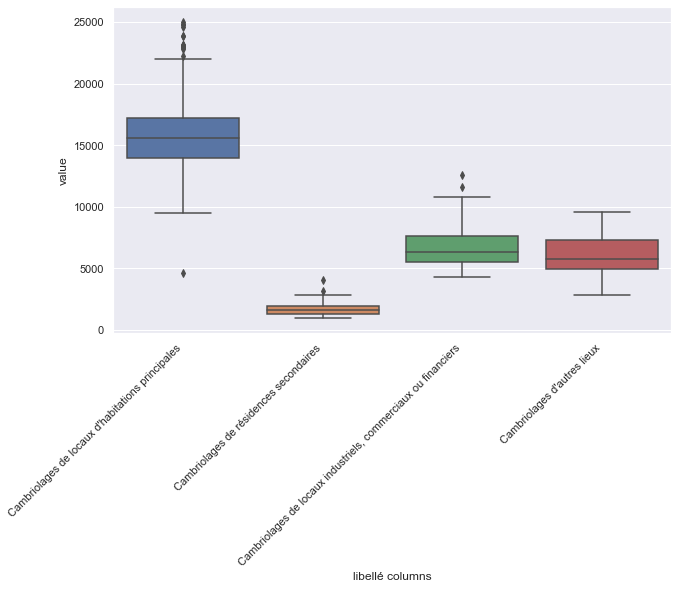

In [33]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[cambriolage_columns]))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

Il est clair que les cambriolages des résidences principales occupent la major partie des cambriolages en France.

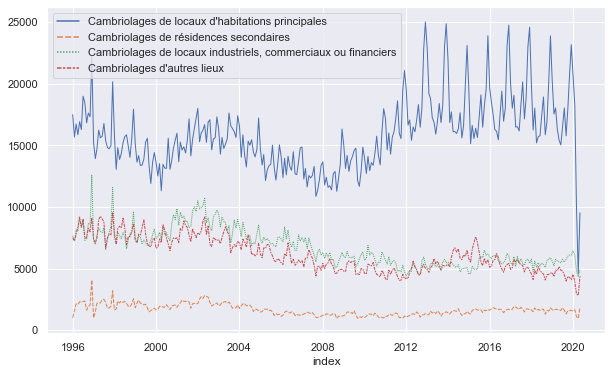

In [34]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc[:,cambriolage_columns], ax=ax, ci=int, linewidth=1);

Une tendance semble émerger depuis 2012 pour les cambriolages d'habitations principales. Aussi réduisons la période à partir de cette année.

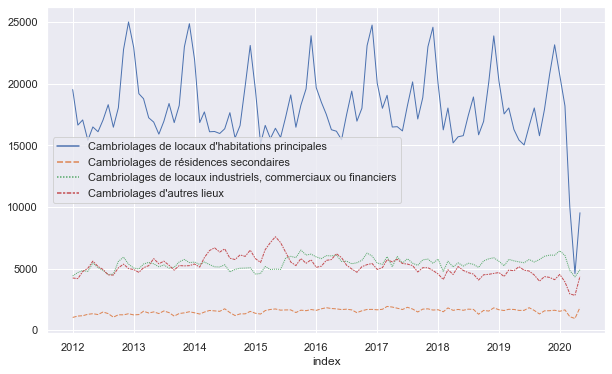

In [35]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc[:'2012-01-01',cambriolage_columns], ax=ax, linewidth=1);

La tendance est bien confirmée. Maintenant, regardons quand le pic de cambriolage des résidences principales se produit. Comparons aussi les cambriolages de l'année 2019 avec la moyenne des cambriolages depuis 1996. Par an, combien avons nous en moyenne de cambriolage ?

libellé columns
Cambriolages de locaux d'habitations principales                 15861.0
Cambriolages de résidences secondaires                            1663.0
Cambriolages de locaux industriels, commerciaux ou financiers     6736.0
Cambriolages d'autres lieux                                       6128.0
dtype: float64


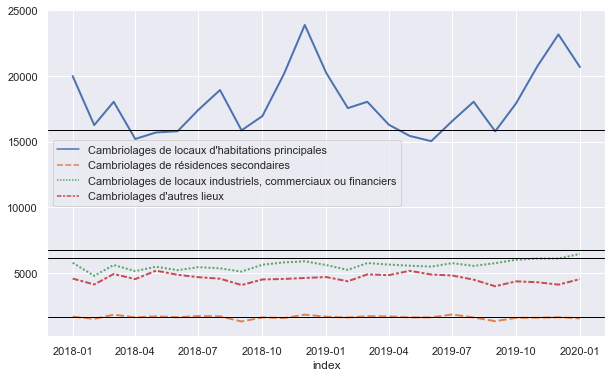

In [36]:
print(round(df[cambriolage_columns].mean(),0))

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2020-01-01':'2018-01-01',cambriolage_columns], ax=ax, linewidth=2)

for mean in df[cambriolage_columns].mean().values:
    ax.axhline(mean, ls='-', color='black', linewidth=1)

Nous pouvons constater que seulement les résidences principales sont concernées par une augmentation du nombre de cambriolages vis-à-vis de leur moyenne depuis 1996. De plus les pics de cambriolages ne concernent visuellement que les habitations principales. Ces pics semblent être focalisé sur les mois de novembre décembre, soit peu de temps avec Noël. Supposons que les autres types de cambriolages soient négligeables, regroupons donc pour continuer notre analyse.

libellé columns  Cambriolages de locaux d'habitations principales  Autre
index                                                                   
2020-05-01                                                   9536  20667
2020-04-01                                                   4601  12717
2020-03-01                                                  10017  18922
2020-02-01                                                  18204  29847
2020-01-01                                                  20682  33197


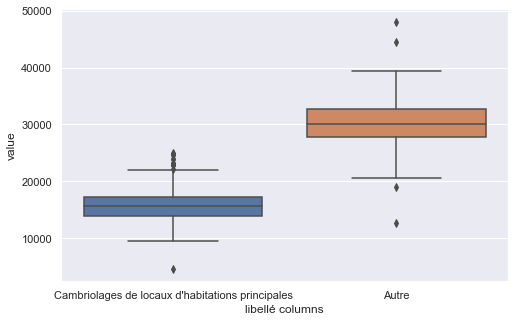

In [37]:
df_cambriolage=df.loc[:,cambriolage_columns]
other_cambriolage_columns = [
    'Cambriolages de résidences secondaires',
    'Cambriolages de locaux industriels, commerciaux ou financiers',
    "Cambriolages d'autres lieux"
]
df_cambriolage["Autre"] = df_cambriolage[cambriolage_columns].sum(axis=1)
df_cambriolage = df_cambriolage.drop(columns=other_cambriolage_columns)
print(df_cambriolage.head(5))

fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df_cambriolage));

En les regroupant, nous pouvons constater que les cambriolages de lieux n'étant pas des habitations principales représentent une part plus significative du nombre de cambriolages. Intéressons-nous maintenant au graphique temporel associé.

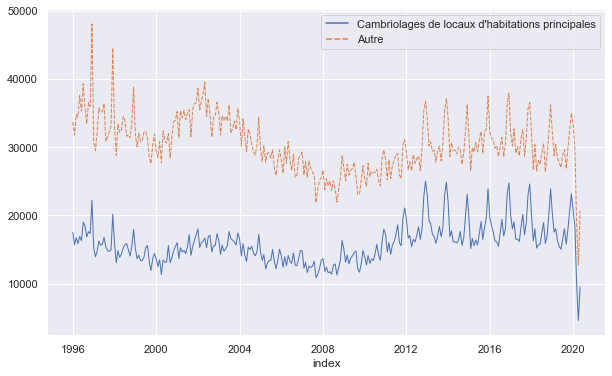

In [38]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_cambriolage, ax=ax, ci=int, linewidth=1);

En les visualisant, nous pouvons constater que la tendance remarquée sur les pics de cambriolages sur les résidences principales est aussi représentée pour les cambriolages d'autres établissements. Nous pouvons en déduire qu'il y a une relation de corrélation entre depuis 2012 entre ces deux variables. Toutefois, il nous est impossible pour l'instant d'en déduire s'il s'agit d'une corrélation hasardeuse ou d'une relation de causalité.

Est-ce que les cambriolages sont représentés dans le département possédant le plus d'incidents ?

Cette question peut être répondue de deux manières. Soit par l'intermédiaire de nombre d'incidents vis-à-vis des départements. Ou alors par le taux d'incident par personne par département. Ces deux approches se valent aussi reprenons les chiffres précédemment calculer.

Pour rappel, le département avec le plus d'incidents est le 75 avec une moyenne de 24 465 incidents par mois. Et le département 48 est celui avec le taux d'incident par personne le plus élevé, à savoir 35.04 % incident par personne.

In [39]:
# Restriction sur le département 75
df_cambriolage_2 = df_all.loc[df_all.departement == '75',cambriolage_columns]
df_cambriolage_2["Autre"] = df_cambriolage_2[cambriolage_columns].sum(axis=1)
df_cambriolage_2 = df_cambriolage_2.drop(columns=other_cambriolage_columns)
df_cambriolage_2.head()

libellé index  Cambriolages de locaux d'habitations principales  Autre
date                                                                  
2020-05-01                                                  467   1007
2020-04-01                                                  153    509
2020-03-01                                                  631   1095
2020-02-01                                                 1225   1872
2020-01-01                                                 1349   1999

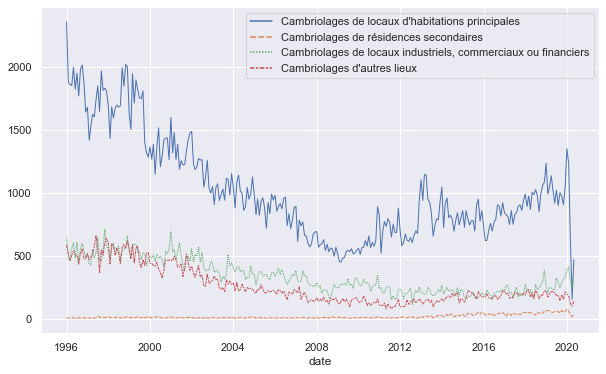

In [40]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '75',cambriolage_columns], ax=ax, ci=int, linewidth=1);

En nous intéressant à ce graphique nous pouvons constater que le nombre de cambriolages dans ce département suit une descendante depuis 1996. Cependant depuis 2009-2010, cette tendance c'est inversé en ayant un pic courant 2013. Focalisons nous maintenant le département avec le taux d'incident le plus élevé.

In [41]:
df_cambriolage_3 = df_all.loc[df_all.departement == '48',cambriolage_columns]
df_cambriolage_3["Autre"] = df_cambriolage_3[cambriolage_columns].sum(axis=1)
df_cambriolage_3 = df_cambriolage_3.drop(columns=other_cambriolage_columns)
df_cambriolage_3.head()

libellé index  Cambriolages de locaux d'habitations principales  Autre
date                                                                  
2020-05-01                                                    2     14
2020-04-01                                                    0      5
2020-03-01                                                    3     12
2020-02-01                                                    4     18
2020-01-01                                                    4     25

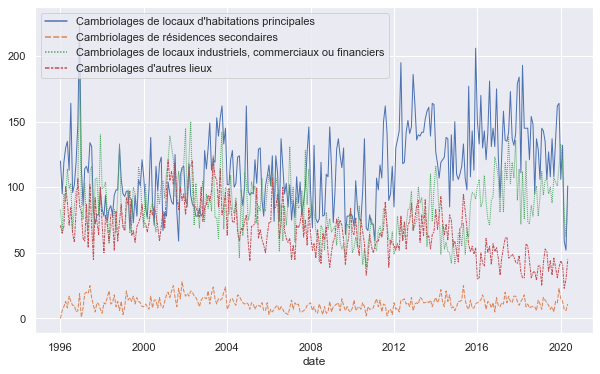

In [42]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '49',cambriolage_columns], ax=ax, ci=int, linewidth=1);

Malgré un taux relativement élevé d'incident par personne, ce département ne possède pas un grand nombre d'observations concernant les cambriolages. Pour des raisons des granularités, il n'est pas intéressant d'étudier par comparaison les départements 48 et 75. Toutefois, regardons la part de cambriolage par personne et par département.

In [43]:
df_cambriolage = df_all.loc[:,cambriolage_columns]
df_cambriolage["Total cambriolage"] = df_cambriolage.loc[:,cambriolage_columns].sum(axis=1)
df_cambriolage["departement"] = df_all.loc[:,'departement']
df_cambriolage["year"] = df_all.loc[:,'year']

# df_cambriolage.head()

mean_cambriolage = round(df_cambriolage.groupby('departement')["Total cambriolage"].mean(), 2).values

df_cambriolage_mean_departement = pd.DataFrame({'Moyenne':mean_cambriolage})
df_cambriolage_mean_departement = df_cambriolage_mean_departement.set_index(departement)

print("Nombre de cambriolage moyen par département par mois : " + str())

df_cambriolage_mean_departement = df_cambriolage_mean_departement.sort_values(by='Moyenne', ascending=True)
print(df_cambriolage_mean_departement.head())
df_cambriolage_mean_departement = df_cambriolage_mean_departement.sort_values(by='Moyenne', ascending=False)
print(df_cambriolage_mean_departement.head())

Nombre de cambriolage moyen par département par mois : 
             Moyenne
departement         
975             0.20
986             1.88
977             2.02
48             17.03
15             27.50
             Moyenne
departement         
75           1632.92
13           1468.86
59           1377.85
69           1251.73
06            890.90


In [44]:
df_cambriolage_year = df_cambriolage.groupby(['year','departement'])["Total cambriolage"].sum()
df_cambriolage_personne = df_population.merge(df_cambriolage_year[2019], left_on='Departement', right_on='departement')
df_cambriolage_personne["% Cambriolage / Personne"] = round(df_cambriolage_personne["Total cambriolage"] / df_cambriolage_personne["Total"] * 100, 2)
df_cambriolage_personne.head()

Departement     Total  Total Homme  Total Femme  \
0          01  656955.0     323345.0     333610.0   
1          02  526050.0     256977.0     269073.0   
2          03  331315.0     158212.0     173103.0   
3          04  165197.0      80612.0      84585.0   
4          05  141756.0      69231.0      72525.0   

   % Population Métropolitaine  Total cambriolage  % Cambriolage / Personne  
0                         0.98               4420                      0.67  
1                         0.78               3228                      0.61  
2                         0.49               1669                      0.50  
3                         0.25                886                      0.54  
4                         0.21                434                      0.31

In [45]:
df_cambriolage_personne = df_cambriolage_personne.sort_values(by='% Cambriolage / Personne', ascending=True)
print("Les plus faibles taux de % de cambriolage / personne")
df_cambriolage_personne.head()

Les plus faibles taux de % de cambriolage / personne


Departement     Total  Total Homme  Total Femme  \
20          2B  182258.0      88411.0      93847.0   
48          48   76286.0      37808.0      38478.0   
50          50  490669.0     239023.0     251646.0   
19          2A  162421.0      78523.0      83898.0   
53          53  305365.0     150300.0     155065.0   

    % Population Métropolitaine  Total cambriolage  % Cambriolage / Personne  
20                         0.27                260                      0.14  
48                         0.11                183                      0.24  
50                         0.73               1164                      0.24  
19                         0.24                390                      0.24  
53                         0.46                863                      0.28

In [46]:
df_cambriolage_personne = df_cambriolage_personne.sort_values(by='% Cambriolage / Personne', ascending=False)
print("Les plus forts taux de % de cambriolage / personne")
df_cambriolage_personne.head()

Les plus forts taux de % de cambriolage / personne


Departement      Total  Total Homme  Total Femme  \
69          69  1876051.0     901603.0     974448.0   
12          13  2034469.0     972786.0    1061683.0   
75          75  2148271.0    1008617.0    1139654.0   
44          44  1437137.0     697201.0     739936.0   
33          33  1633440.0     785304.0     848136.0   

    % Population Métropolitaine  Total cambriolage  % Cambriolage / Personne  
69                         2.80              17662                      0.94  
12                         3.03              17727                      0.87  
75                         3.20              18326                      0.85  
44                         2.14              11297                      0.79  
33                         2.44              12909                      0.79

In [47]:
print("Moyenne d'acte criminel/délit par mois par département")

Moyenne d'acte criminel/délit par mois par département


Pour résumer l'analyse des cambriolages en France :
- Les cambriolages touchent par mois entre 0,15% et 1% de la population française (dépendant de la région)
- Entre 1996 et 2008, le nombre de cambriolages en France suivait une tendance de diminution,
- Depuis 2008, la tendance est repartie à la hausse,
- Depuis 2012, les cambriolages manifestent des pics périodiques à l'approche de la période de Noël (hivernale).
- Le département le plus touché par les cambriolages est le 69, et le moins touché est le 2B


<a id='section2.3.2'></a>
#### *2.3.2. Homicides / murders*

Continuons avec l'axe homicide.

libellé columns  Homicides pour voler et à l'occasion de vols  \
count                                                  293.00   
mean                                                     3.68   
std                                                      3.00   
min                                                      0.00   
25%                                                      2.00   
50%                                                      3.00   
75%                                                      5.00   
max                                                     16.00   

libellé columns  Homicides pour d'autres motifs  \
count                                    293.00   
mean                                      57.30   
std                                       15.71   
min                                       29.00   
25%                                       47.00   
50%                                       55.00   
75%                                       65.00   
max                                      170.00   

libellé columns  Tentatives d'homicides pour voler et à l'occasion de vols  \
count                                                       293.00           
mean                                                          6.96           
std                                                           4.34           
min                                                           0.00           
25%                                                           4.00           
50%                                                           6.00           
75%                                                           9.00           
max                                                          26.00           

libellé columns  Tentatives homicides pour d'autres motifs  \
count                                               293.00   
mean                                                110.59   
std                                                  45.28   
min                                                  50.00   
25%                                                  82.00   
50%                                                  93.00   
75%                                                 124.00   
max                                                 264.00   

libellé columns  Homicides commis contre enfants de moins de 15 ans  
count                                                       293.00   
mean                                                          5.64   
std                                                           3.14   
min                                                           0.00   
25%                                                           3.00   
50%                                                           5.00   
75%                                                           7.00   
max                                                          20.00

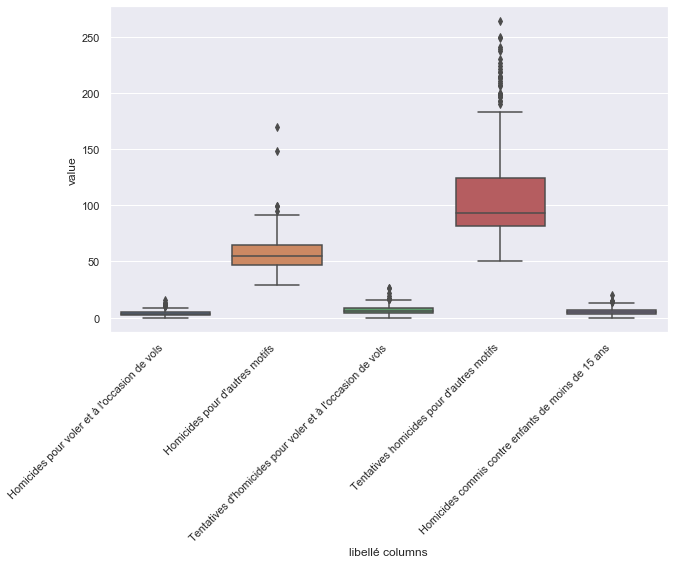

In [48]:
# Crimes and mesdemeanours concerning murders
homicides_columns = df.filter(regex=(".*[Hh]omicide?s.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[homicides_columns]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

round(df[homicides_columns].describe(), 2)

Cet axe regroupe deux aspects. D'un côté les homicides et de l'autre les tentatives d'homicide. On remarque que l'immense majorité de ces cas représente des homicides et tentatives d'homicide pour des raisons autres que "pour voler", "à l'occasion de vols" ou "contre des enfants de moins de 15 ans".

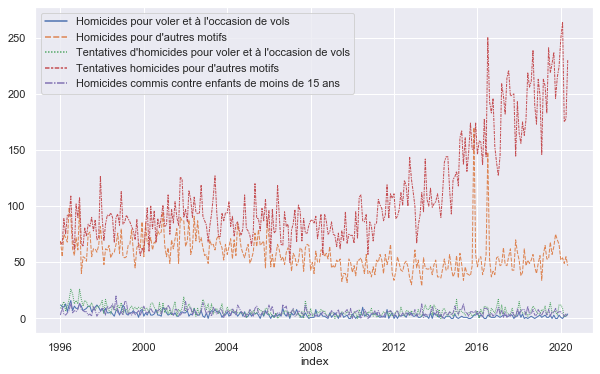

In [49]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[homicides_columns], ax=ax, ci=int, linewidth=1);

Cette visualisation est difficile à interpréter, pour plus de simplicité nous allons décomposer en homicide et tentative d'homicides. Cependant, nous pouvons constater une tendance émergente pour les tentatives d'homicide "d'autres motifs" depuis 2010. De plus, deux pics d'homicides sont représentés autour de l'année 2016.

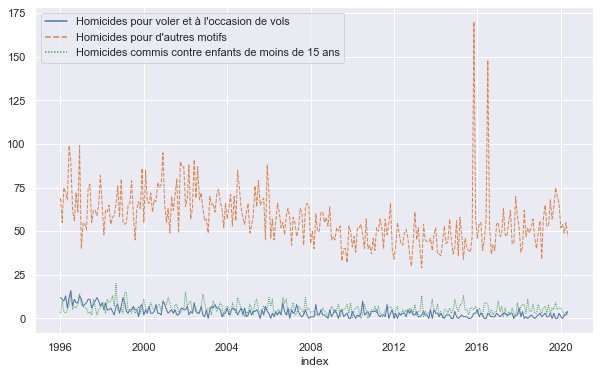

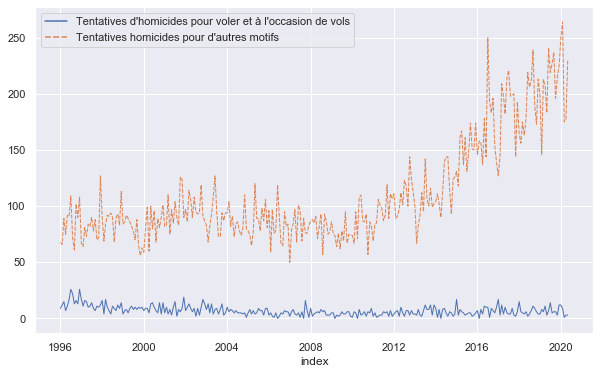

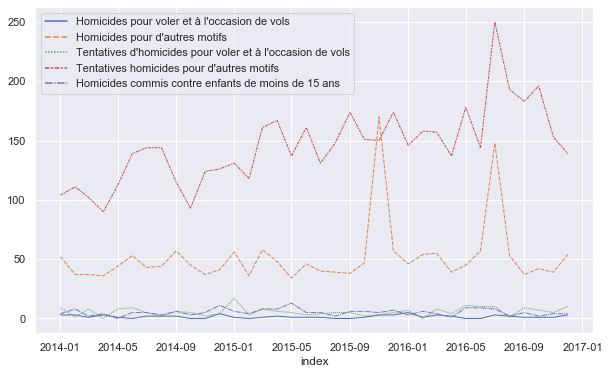

In [50]:
# Homicides
only_homicides_columns = df.filter(regex=(".*Homicides.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[only_homicides_columns], ax=ax, ci=int, linewidth=1)

# Tentatives
only_tentative_homicides_columns = df.filter(regex=(".*homicides.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[only_tentative_homicides_columns], ax=ax, ci=int, linewidth=1)

# Zoom
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2016':'2014',homicides_columns], ax=ax, linewidth=1);

La tendance et ces pics sont plus clairs maintenant. En affichant la vue entre l'année 2014 et 2016, nous pouvons observer les deux pics d'homicides précédemment évoquées en fin d'année 2015 et en été 2016. Ces pics correspondent aux deux périodes d'attaques terroristes en France. La première à Paris sur plusieurs sites (dont le bataclan) et la seconde à Nice sur la promenade des Anglais. Ce deuxième justifie aussi le pic de tentatives d'homicide dû au grand nombre de blessés par cette seconde attaque.

Le '75' est le département  avec le plus haut taux de cambriolage. Quand est-il des homicides ?

libellé index  All Homicide  All Tenta Homicide
date                                           
2020-05-01                0                  15
2020-04-01                1                  12
2020-03-01                1                  16
2020-02-01                2                  13
2020-01-01                4                  16

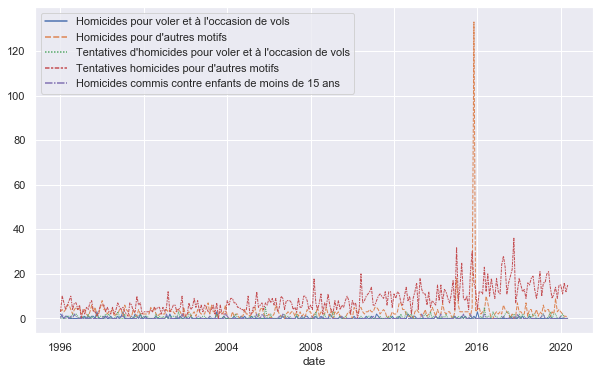

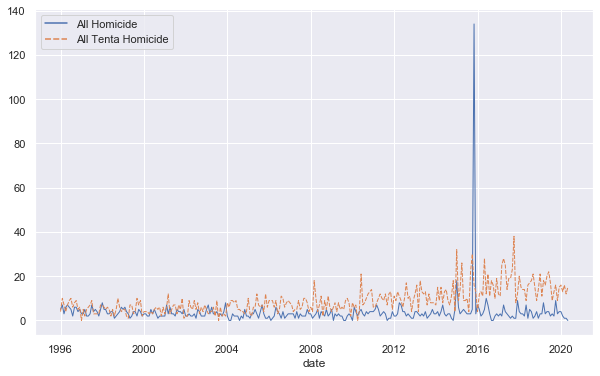

In [51]:
# Restriction sur le département 75
df_homicide = df_all.loc[df_all.departement == '75',homicides_columns]
df_homicide["All Homicide"] = df_homicide[only_homicides_columns].sum(axis=1)
df_homicide["All Tenta Homicide"] = df_homicide[only_tentative_homicides_columns].sum(axis=1)

df_homicide = df_homicide.drop(columns=homicides_columns)

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '75',homicides_columns], ax=ax, ci=int, linewidth=1)


fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_homicide, ax=ax, ci=int, linewidth=1)

df_homicide.head()

Le département 75 a fait partie zones d'attaque terroriste, d'où la présence du pic fin 2015. En comparaison de la France, ce département est l'une des principales zones où l'on peut constater des homicides et tentatives d'homicide. De plus, ce département présente une hausse du nombre de tentatives d'homicide.

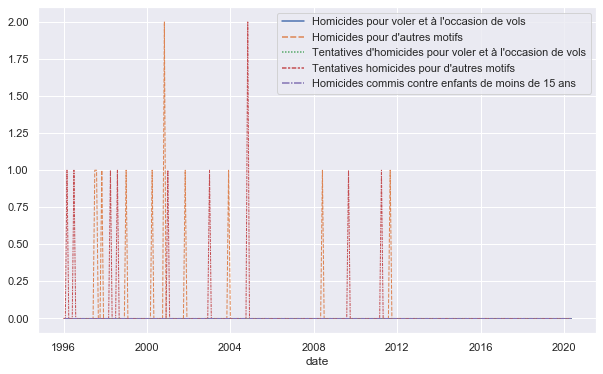

In [52]:
# Restriction sur le département 48
df_homicide = df_all.loc[df_all.departement == '48',homicides_columns]
df_homicide["Autre"] = df_homicide[homicides_columns].sum(axis=1)
df_homicide = df_homicide.drop(columns=homicides_columns)

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '48',homicides_columns], ax=ax, ci=int, linewidth=1);

Dans le département 48, nous constatons une absence totale d'homicide et un très faible taux du nombre de tentatives d'homicide. Pourraient être intéressants de regarder les zones les plus soumis aux homicides et tentatives d'homicide. <br>

Pour résumer l'axe homicide :
- La France a vu son taux d'homicide diminuer de manière globale. Cependant certains évènements (attaques terroristes) ont causé une augmentation du nombre d'homicide et de tentatives d'homicide.
- Depuis 2010, la France connait une tendance progressive du nombre de tentatives d'homicide qui a pratiquement triplé.

<a id='section2.3.3'></a>
#### *2.3.3. Vols*
Passons maintenant à l'axe vols.

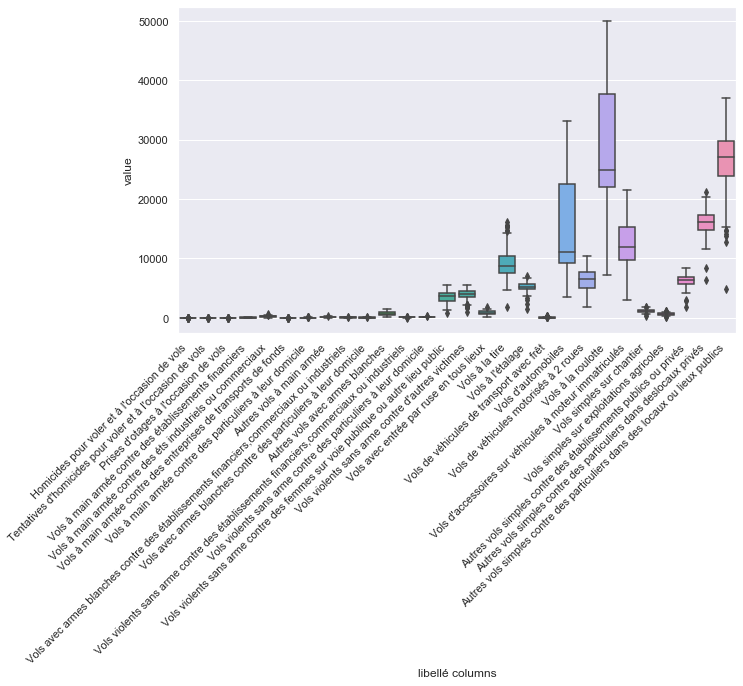

In [53]:
# Crimes and mesdemeanours concerning thief
voles_columns = df.filter(regex=(".*[Vv]ol?[es].*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[voles_columns]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

L'analyse de l'axe vols est complexe. Pour permettre de la rendre plus pertinente, nous allons la décomposer en sous-axes.

La grande quantité d'information rend difficile l'exploitation simple de ce dernier axe. Aussi nous allons le subdivisé en fonction de critère pour avoir 5 sous catégories :
- vols à main
- vols spécifiques
- vols violents
- vols 'simple'
- vols véhicule

##### *2.3.3.1. Vols à main*

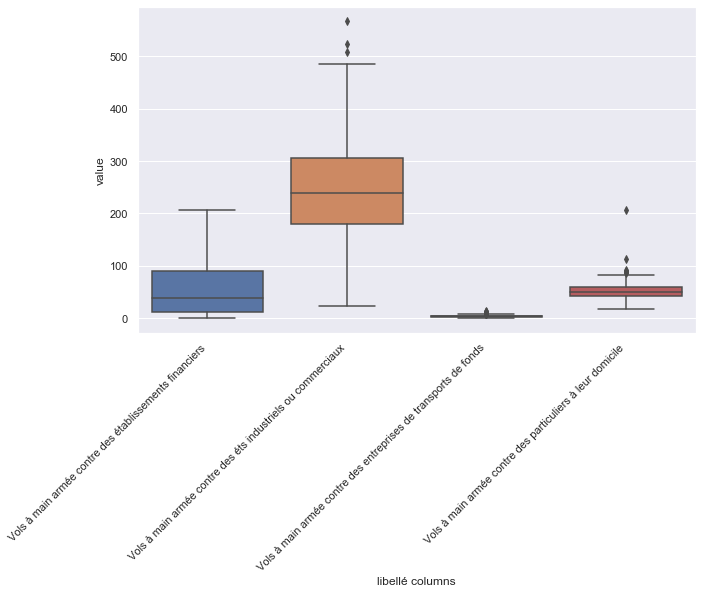

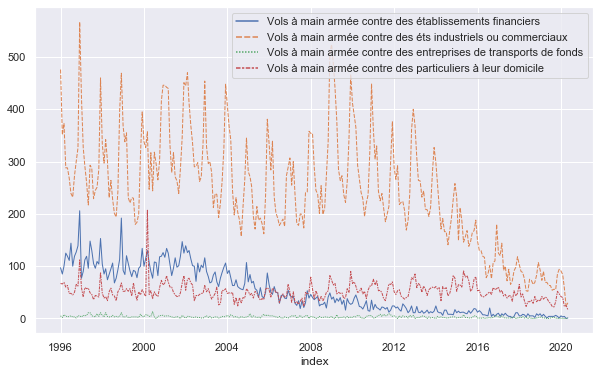

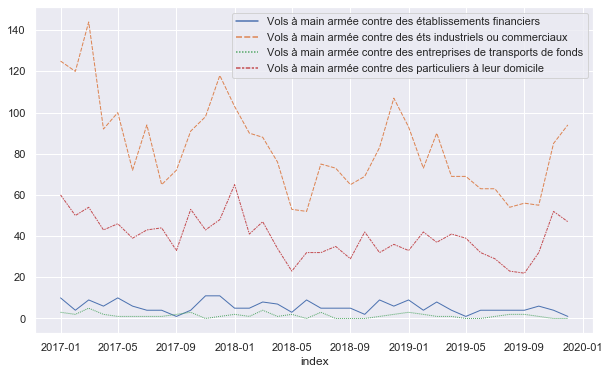

In [54]:
vols_with_hands_column = df.filter(regex=(".*Vols à main.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_with_hands_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_with_hands_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2017',vols_with_hands_column], ax=ax, ci=int, linewidth=1);

Il apparait très clairement une tendance périodique sur les vols à main armée contre des établissements industriels ou commerciaux. Celle-ci semble correspondre à l'arrivée de la période de Noël. Les vols à main armée contre des établissements industriels ou commerciaux suivent aussi une tendance qui tend à diminuer depuis 2010. Sur cet axe, les vols à main armée contre des établissements industriels ou commerciaux sont les plus importants, les autres étaient moins importants, aussi nous allons les regrouper.

libellé columns  Vols à main armée contre des éts industriels ou commerciaux  \
index                                                                          
2020-05-01                                                      30             
2020-04-01                                                      23             
2020-03-01                                                      58             
2020-02-01                                                      84             
2020-01-01                                                      91             

libellé columns  Autre  
index                   
2020-05-01          19  
2020-04-01          25  
2020-03-01          27  
2020-02-01          43  
2020-01-01          48

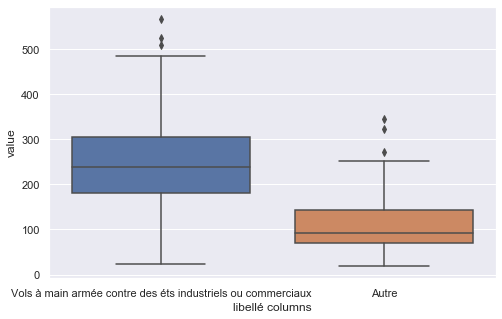

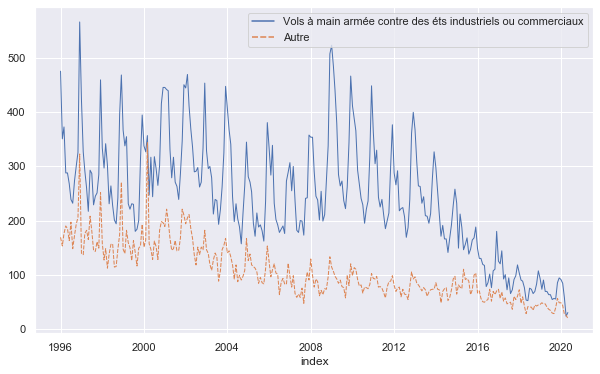

In [55]:
df_vols_with_hands = df.loc[:,vols_with_hands_column]
other_steal_columns = [
    'Vols à main armée contre des établissements financiers',
    'Vols à main armée contre des entreprises de transports de fonds',
    'Vols à main armée contre des particuliers à leur domicile'
]

df_vols_with_hands["Autre"] = df_vols_with_hands[other_steal_columns].sum(axis=1)
df_vols_with_hands = df_vols_with_hands.drop(columns=other_steal_columns)

fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df_vols_with_hands));

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_vols_with_hands, ax=ax, ci=int, linewidth=1);

df_vols_with_hands.head()

Cette représentation plus simple nous confirme qu'il apparait ici très clairement qu'en France les vols à main armée tendent à diminuer.

##### *2.3.3.2. Vols spécifiques*

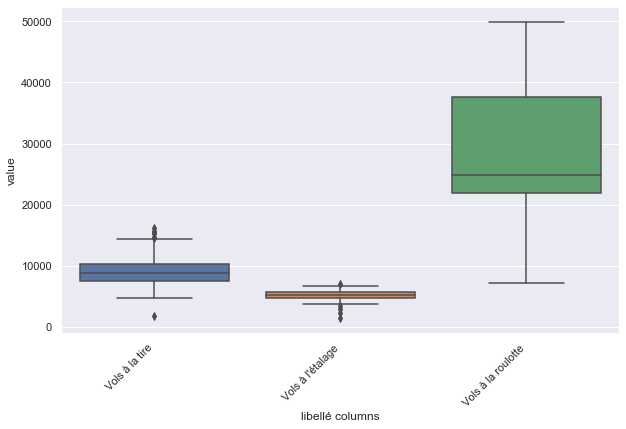

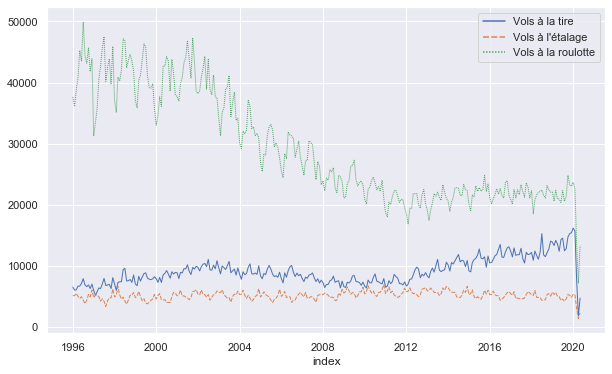

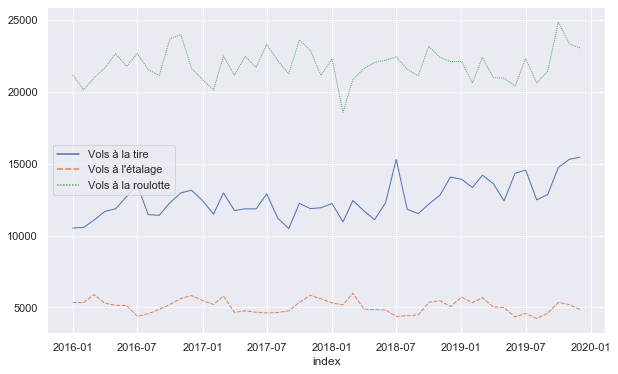

In [56]:
vols_specific_column = ['Vols à la tire', "Vols à l'étalage", 'Vols à la roulotte']

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_specific_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_specific_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2016',vols_specific_column], ax=ax, ci=int, linewidth=1);

Les vols dits spécifiques représentent la plus grande quantité de cas enregistrés en France. Ici nous allons rester assez simpliste. Il existe une tendance décroissante du nombre de vols à la roulotte, à l'inverse les vols à la tire tendent à augmenter depuis 2012.

##### *2.3.3.3. Vols violents*

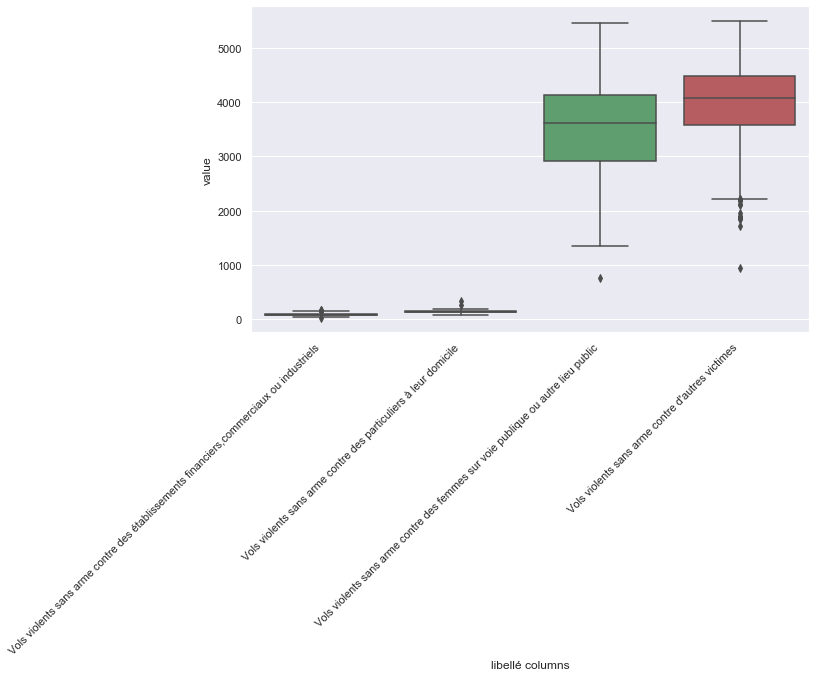

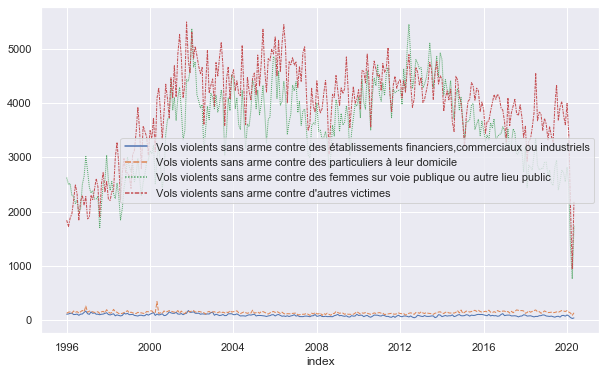

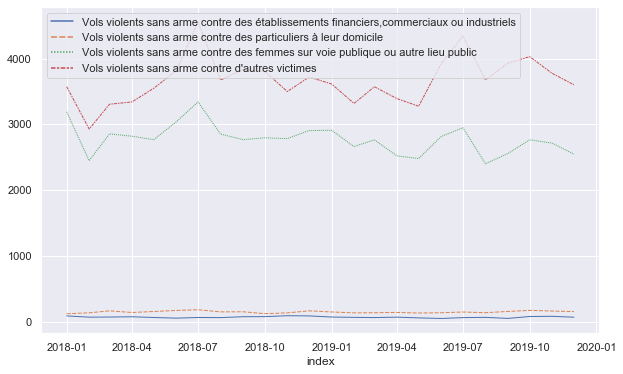

In [57]:
vols_violents_column = df.filter(regex=(".*Vols violents.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_violents_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_violents_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2018',vols_violents_column], ax=ax, ci=int, linewidth=1);

In [58]:
vols_violents_column

array(['Vols violents sans arme contre des établissements financiers,commerciaux ou industriels',
       'Vols violents sans arme contre des particuliers à leur domicile',
       'Vols violents sans arme contre des femmes sur voie publique ou autre lieu public',
       "Vols violents sans arme contre d'autres victimes"], dtype=object)

Ce sous-axe peut être séparé en deux ensembles. D'un côté les "Vols violents sans arme contre des femmes sur voie publique ou autre lieu public" avec les "Vols violents sans arme contre d'autres victimes" qui représenter la majorité des données de cette analyse et de l'autre les "Vols violents sans arme contre des établissements financiers, commerciaux ou industriels" avec les "Vols violents sans arme contre des particuliers à leur domicile" qui sont pratiquement inexistant en comparaison.

##### *2.3.3.4. Vols simple*

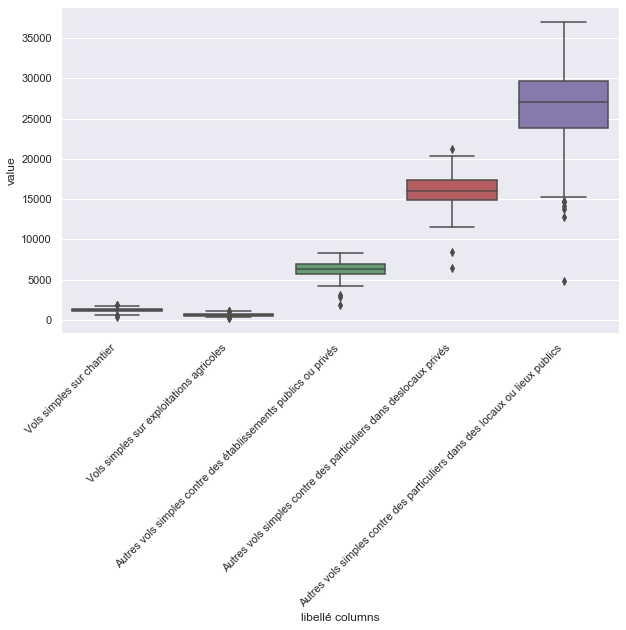

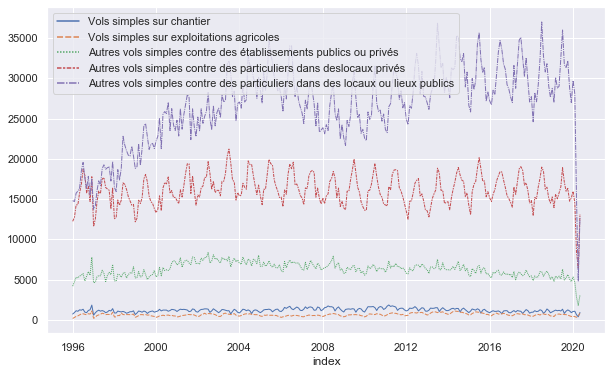

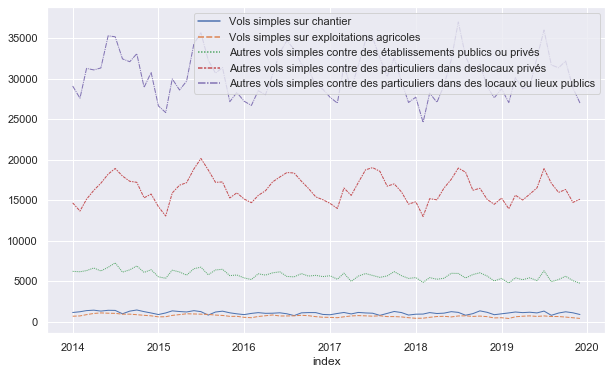

In [59]:
vols_simple_column = df.filter(regex=(".*simple.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_simple_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_simple_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2014',vols_simple_column], ax=ax, ci=int, linewidth=1);

Nous pouvons remarquer que la quantité de données liées aux activités 'Vols simples sur chantier', 'Vols simples sur exploitations agricoles' et 'Autres vols simples contre des établissements publics ou privés' sont assez restreintes en comparaison des 'Autres vols simples contre des particuliers dans deslocaux privés' et des 'Autres vols simples contre des particuliers dans des locaux ou lieux publics'. Aussi nous allons les regrouper pour plus de simpliciter.

In [60]:
vols_simple_column

array(['Vols simples sur chantier',
       'Vols simples sur exploitations agricoles',
       'Autres vols simples contre des établissements publics ou privés',
       'Autres vols simples contre des particuliers dans deslocaux privés',
       'Autres vols simples contre des particuliers dans des locaux ou lieux publics'],
      dtype=object)

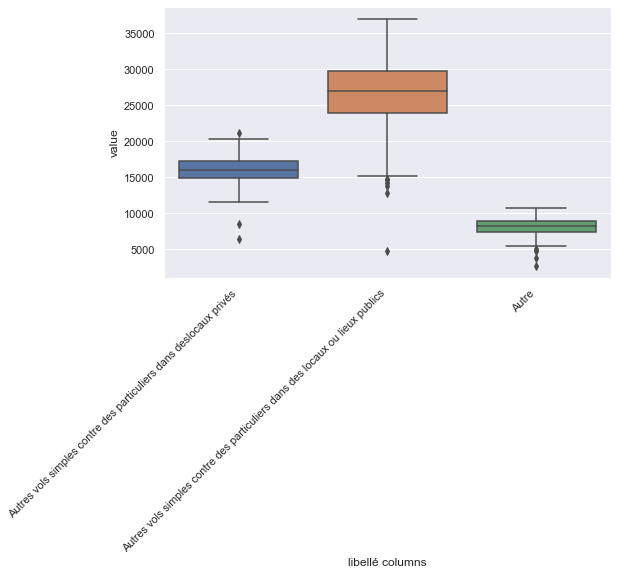

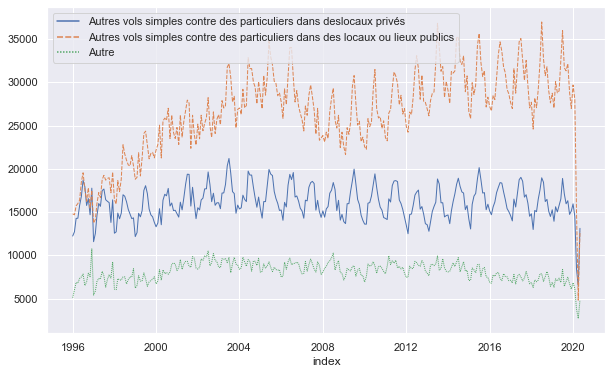

In [61]:
df_vols_simple_column = df.loc[:,vols_simple_column]
        
other_steal_2_columns = [
    'Vols simples sur chantier',
    'Vols simples sur exploitations agricoles',
    'Autres vols simples contre des établissements publics ou privés'
]

df_vols_simple_column["Autre"] = df_vols_simple_column[other_steal_2_columns].sum(axis=1)
df_vols_simple_column = df_vols_simple_column.drop(columns=other_steal_2_columns)

fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df_vols_simple_column));
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_vols_simple_column, ax=ax, ci=int, linewidth=1);

Ce regroupement nous permet de visualiser des périodicités sur l'ensemble des actes de ce sous-axe.

##### *2.3.3.5. Vols véhicule*

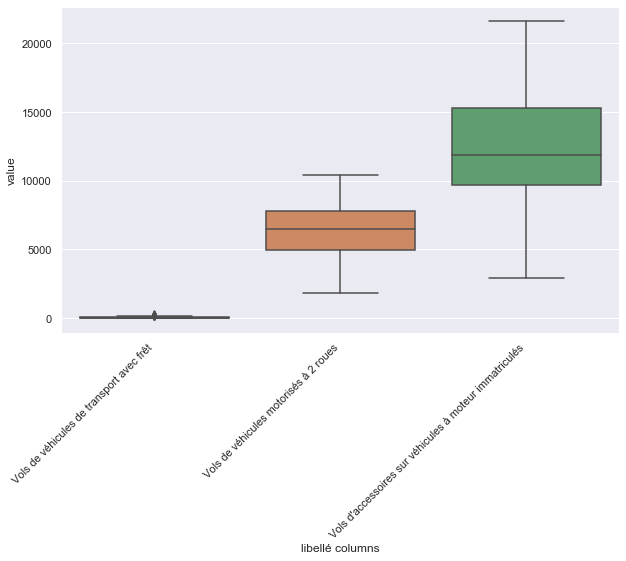

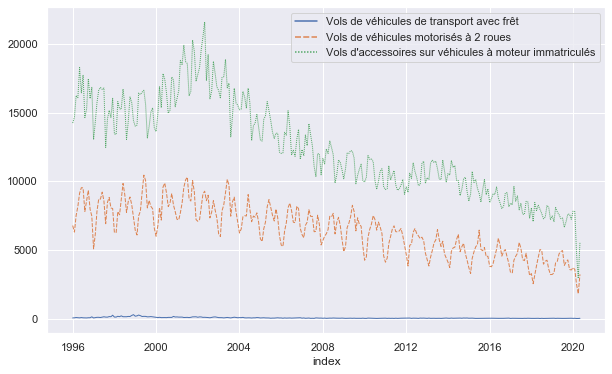

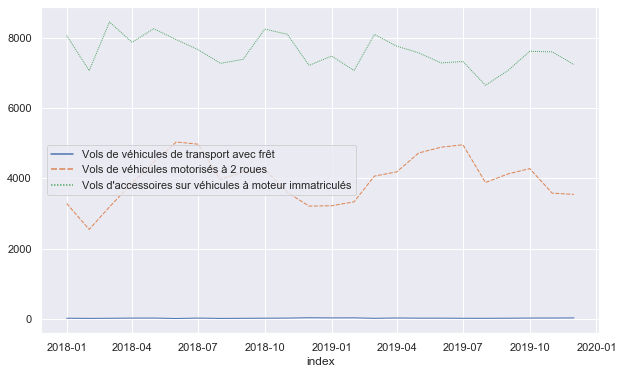

In [62]:
vols_vehicules_column = df.filter(regex=("Vols.*véhicule.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[vols_vehicules_column]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[vols_vehicules_column], ax=ax, ci=int, linewidth=1);

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2018',vols_vehicules_column], ax=ax, ci=int, linewidth=1);

Ce dernier sous axe montre que le nombre de vols de véhicule motorisés à 2 roues et de transport avec frêt tend à diminuer.

<a id='section3'></a>
## 3. Machine Learning 

Reprenons le jeu de donnée initial. Nous allons opérer en trois temps :
- Réalisation d’un premier modèle « simpliste » avec deux modèles sur un cas d’usage
- Mise en place d’un processus de prédiction « industriel » sur de multiples variables
- Évaluation des résultats des modèles d’apprentissage

<a id='section3.1'></a>
### 3.1. Cas d’étude : prédiction des cambriolages en France par département et par mois
Commençons par importer les librairies nécessaires à ce premier point

In [63]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Ensuite, définissons les variables nécessaires à notre cas d’étude. Elles vont permettre de préparer les données d’entré des différents modèles et de réaliser par la suite un train test split. Nous allons aussi réaliser une étape de prétransformation (ici une seule de catégorisation). L’objectif par cette étape est de considérer toutes les valeurs possibles des différentes dimensions d’input comme étant elle-même des dimensions. 

In [64]:
########################################
# Define input & array columns
input_columns = ['departement','year','month']
array_input_columns = np.asarray(input_columns)

########################################
# Case to study
cambriolage_columns = df.filter(regex=(".*[Cc]ambriolage?s.*")).columns.values
champs_to_predict = "Total_Cambriolage"
column_to_use = np.concatenate((cambriolage_columns, array_input_columns), axis=None)

##################################################
# Préparation des données d'input
df_ml = df_all.loc[:,column_to_use]
df_ml[champs_to_predict] = df_ml[cambriolage_columns].sum(axis=1)
df_ml = df_ml.drop(columns=cambriolage_columns)
df_ml = df_ml['2018':'2019']
df_ml = df_ml.reset_index()

values_to_drop = [champs_to_predict,'date']
X = df_ml.drop(labels = values_to_drop, axis=1)
y = df_ml.loc[:,champs_to_predict]

##################################################
#  No pipeline, only pre_processor categorical
enc = OneHotEncoder()
enc.fit(X)
X = enc.transform(X).toarray()

#########################
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test = pd.Series(y_test, dtype='float')


Les données sont prêtes à être exploitées par des modèles d’apprentissage. Dès l’obtention des prédictions, nous pourrons comparer les résultats sur ce modèle d’apprentissage. Pour calculer évaluer l’impact de se modèle, nous allons calculer deux variables : le RMSE et le pourcentage d’erreur moyen relatif aux données réelles. Pour ces deux mesures, l’objectif est d’avoir la plus petite valeur possible.

In [65]:
##################################################
# Apprentissage
cart_ml = DecisionTreeRegressor()
reg_ml = LinearRegression()

cart_ml.fit(X_train, y_train)
reg_ml.fit(X_train, y_train)

#########################
# prediction
y_test_pred_1 = cart_ml.predict(X_test)
y_test_pred_2 = reg_ml.predict(X_test)

#########################
# Output Test
X_test = enc.inverse_transform(X_test)

# DTR
df_ml_res_test_1 = pd.DataFrame(
    data = X_test,
    columns = input_columns
)
df_ml_res_test_1["Valeur_Reel"] = y_test.values
df_ml_res_test_1["Valeur_Predict"] = y_test_pred_1
df_ml_res_test_1["Difference_abs"] = abs(df_ml_res_test_1["Valeur_Reel"]-df_ml_res_test_1["Valeur_Predict"])
df_ml_res_test_1["%_Error"] = df_ml_res_test_1["Difference_abs"]/df_ml_res_test_1["Valeur_Reel"]

# LR
df_ml_res_test_2 = pd.DataFrame(
    data = X_test,
    columns = input_columns
)
df_ml_res_test_2["Valeur_Reel"] = y_test.values
df_ml_res_test_2["Valeur_Predict"] = y_test_pred_2
df_ml_res_test_2["Difference_abs"] = abs(df_ml_res_test_2["Valeur_Reel"]-df_ml_res_test_2["Valeur_Predict"])
df_ml_res_test_2["%_Error"] = df_ml_res_test_2["Difference_abs"]/df_ml_res_test_2["Valeur_Reel"]

#########################
# Résultats
df_moy_1 = df_ml_res_test_1[df_ml_res_test_1["Valeur_Reel"] != 0]
Err_Moy_Test_1 = round(df_moy_1["%_Error"].mean(),3)*100

df_moy_2 = df_ml_res_test_2[df_ml_res_test_2["Valeur_Reel"] != 0]
Err_Moy_Test_2 = round(df_moy_2["%_Error"].mean(),3)*100

RMSE_test_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
RMSE_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))

#########################
# Affichage

print("RMSE test 1 : " + str(RMSE_test_1))
print("% Err Moy effectif test 1 : " + str(Err_Moy_Test_1) + " %")
print("RMSE test 2 : " + str(RMSE_test_2))
print("% Err Moy effectif test 2 : " + str(Err_Moy_Test_2) + " %")

RMSE test 1 : 61.0731631578581
% Err Moy effectif test 1 : 18.6 %
RMSE test 2 : 57.9396550633558
% Err Moy effectif test 2 : 47.9 %


En regardant ces résultats, nous pouvons tout de suite distinguer une grande disparité entre le RMSE et le pourcentage d’erreur moyen relatif. Si nous nous focalisons sur le RMSE, nous pouvons supposer que le test 2 est plus performant. À contrario, en se focalisant sur le pourcentage d’erreurs moyen effectif, ce serait le test 1.

En effet, si les deux modèles étaient relativement égaux (en termes de performance et de variation), les deux RMSE et les pourcentages d’erreurs moyennes effectifs aurait été proches l’un de l’autre. Or, ici le pourcentage d’erreurs moyen effectif (que l’on pourrait nommer l’erreur « réel ») est bien inférieur pour le premier test.

Cet aspect est totalement compréhensible. En effet, les modèles disposent en entrée d’une grande variété de valeurs (et par conséquent possiblement d’échelle). L’objectif est de minimiser l’erreur globale indépendamment des résultats. Pour pouvoir tenir compte au même poids des différences d’échelle, la mesure RMSE n’est pas la plus optimale et il faut privilégier le RMSLE.

En réalité l’utilisation du RMSLE permet uniquement de minimiser les erreurs des données d’eu aux différentes échelles ainsi que celle outliers. Dans une comparaison entre deux modèles distincts, le RMSE peut être suffisant. Cependant, ici nous allons comparer potentiellement n modèle, avec n préprocesseur, dans n cas. Le RMSE va donc vite être limité !

Remarque : avec le RMSLE il ne faut pas avoir de valeurs négatives et surtout n’avoir aucune valeur inférieure à 1. Compte tenu des potentiels résultats prédits, nous allons avoir deux manières de calculer le RMSLE : avec le log et le log + 1. Les résultats doivent théoriquement renvoyer le même résultat, sauf si une partie des données prédites se trouvent être entre – l’infinie et 0. Ainsi nous privilégierons le meilleur résultat parmi ces deux méthodes 😉

In [66]:
ytest = y_test

ypred = y_test_pred_1
print("RMSLE 1 :")
print(np.sqrt(mean_squared_log_error(ypred, ytest)))
print(np.sqrt(mean_squared_log_error(np.abs(ypred), np.abs(ytest))))
print(np.sqrt(np.mean((np.log1p(ypred, out=None) - np.log1p(ytest, out=None))**2)))

print("RMSE 1 :")
print(np.sqrt(mean_squared_error(np.abs(ypred), np.abs(ytest))))

ypred = y_test_pred_2
print("RMSLE 2 :")
print(np.sqrt(mean_squared_log_error(np.abs(ypred), np.abs(ytest))))
print(np.sqrt(np.mean((np.log1p(ypred, out=None) - np.log1p(ytest, out=None))**2)))

print("RMSE 2 :")
print(np.sqrt(mean_squared_error(np.abs(ypred), np.abs(ytest))))

RMSLE 1 :
0.24878928237424242
0.24878928237424242
0.2487892823742424
RMSE 1 :
61.0731631578581
RMSLE 2 :
0.5171634495426011
0.4099522135583395
RMSE 2 :
57.83806106017447


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log1p
  from ipykernel import kernelapp as app


Les résultats ici sont sans appel : le modèle du test 1 est bien plus performant que celui du test 2 et cela malgré à taux qui semblait être meilleur pour le RMSE. Nous pouvons aussi visualiser les tableaux associés aux résultats du test 1. Une seule chose à dire, c’est bien pour un premier jet. 

In [67]:
df_moy_1.head(6)

departement  year month  Valeur_Reel  Valeur_Predict  Difference_abs  \
0         978  2019    08          6.0            15.0             9.0   
1          37  2019    11        232.0           222.0            10.0   
2          49  2019    11        306.0           268.0            38.0   
3          2B  2019    07         20.0            20.0             0.0   
4          26  2018    01        309.0           304.0             5.0   
5          69  2018    07       1243.0          1162.0            81.0   

    %_Error  
0  1.500000  
1  0.043103  
2  0.124183  
3  0.000000  
4  0.016181  
5  0.065165

In [68]:
df_moy_2.head(6)

departement  year month  Valeur_Reel  Valeur_Predict  Difference_abs  \
0         978  2019    08          6.0         6.90625         0.90625   
1          37  2019    11        232.0       272.53125        40.53125   
2          49  2019    11        306.0       301.03125         4.96875   
3          2B  2019    07         20.0        13.12500         6.87500   
4          26  2018    01        309.0       281.56250        27.43750   
5          69  2018    07       1243.0      1398.12500       155.12500   

    %_Error  
0  0.151042  
1  0.174704  
2  0.016238  
3  0.343750  
4  0.088794  
5  0.124799

<a id='section3.2'></a>
### 3.2. Industrialisation du processus de prédiction

Maintenant que la première partie est terminée et que les grandes étapes pour « ce modèle » ont été définies, nous pouvons mettre en place la base d’un processus de prédiction type « industriel ». Pour cela il va falloir « automatiser » toutes les « étapes » précédentes. Commençons d’abord par importer les modules nécessaires.

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from joblib import dump, load

Définissons ensuite les variables nécessaires à notre processus avec notamment :
- Les variables nécessaires,
- Les différents modèles devant être utilisés,
- Le tableau des scores (qui servira à comparer les différents résultats de modèles),
- Les dictionnaires qui vont récapituler les données utilisables dans le processus (équivalent à un mock)


In [70]:
########################################
# Define input & array columns
input_columns = ['departement','year','month']
array_input_columns = np.asarray(input_columns)

########################################
# Define model regressor
cart_ml = DecisionTreeRegressor(criterion='mse')
rf_ml = RandomForestRegressor()
reg_ml = LinearRegression()
svr_ml = SVR()

models = [
    {
        'name':'cart',
        'model':cart_ml
    },
    {
        'name':'random forest',
        'model':rf_ml
    },
    {
        'name':'regression linéaire',
        'model':reg_ml
    },
    {
        'name':'SVR',
        'model':svr_ml
    }
]

########################################
# Préparation du tableau de score
columns = [
    'Dictionnaire',
    'ValeurPredict',
    'PreProcessing',
    'SCORING_Type',
    'Model',
    'SCORE_Test',
    'Err_Moy_Test',
    'SCORE_Val',
    'Err_Moy_Val'
]

data = {
    'Dictionnaire':["Nom du dictionnaire utilisé"],
    'ValeurPredict':["Nom de la variable"],
    'PreProcessing':["Pré-processus"],
    'SCORING_Type':['Nom du type de score'],
    'Model':["Nom du model"],
    'SCORE_Test':["0"],
    'Err_Moy_Test':["0"],
    'SCORE_Val':["0"],
    'Err_Moy_Val':["0"]
}

df_result = pd.DataFrame(data = data, columns = columns)
df_result = df_result.iloc[1:]

df_result['SCORE_Test'] = df_result['SCORE_Test'].astype(float)
df_result['Err_Moy_Test'] = df_result['Err_Moy_Test'].astype(float)
df_result['SCORE_Val'] = df_result['SCORE_Val'].astype(float)
df_result['Err_Moy_Val'] = df_result['Err_Moy_Val'].astype(float)

########################################
# Dictionnaire
####################
### Cambriolage
cambriolage_columns = df.filter(regex=(".*[Cc]ambriolage?s.*")).columns.values
other_cambriolage_columns = [
    'Cambriolages de résidences secondaires',
    'Cambriolages de locaux industriels, commerciaux ou financiers',
    "Cambriolages d'autres lieux"
]

# Dictionnaire
cambriolage_case = {
    'column_to_use':[
        np.concatenate((cambriolage_columns, array_input_columns), axis=None),
        np.concatenate(("Cambriolages de locaux d'habitations principales", array_input_columns), axis=None),
        np.concatenate((other_cambriolage_columns, array_input_columns), axis=None)
    ],
    'case':[cambriolage_columns,None,other_cambriolage_columns],
    'champs_to_predict':["Total_Cambriolage","Cambriolages de locaux d'habitations principales","Autre"],
    'date':('2018','2019'),
    'name':'cambriolage_case'
}

####################
# Homicide et tentative
# 2018 2019
# Homicide séparation
all_homicides_columns = df.filter(regex=(".*[Hh]omicide?s.*")).columns.values

only_homicides_columns = df.filter(regex=(".*Homicides.*")).columns.values
only_tentative_homicides_columns = df.filter(regex=(".*homicides.*")).columns.values

murder_case = {
    'column_to_use':[
        np.concatenate((only_homicides_columns, array_input_columns), axis=None),
        np.concatenate((only_tentative_homicides_columns, array_input_columns), axis=None)
    ],
    'case':[only_homicides_columns,only_tentative_homicides_columns],
    'champs_to_predict':["Total Homicide","Total tenta Homicide"],
    'date':('2018','2019'),
    'name':'murder_case'
}

####################
# les vols :
# Vols à main (3 cas) 2017 2019

vols_with_hands_column = df.filter(regex=(".*Vols à main.*")).columns.values
other_steal_columns = [
    'Vols à main armée contre des établissements financiers',
    'Vols à main armée contre des entreprises de transports de fonds',
    'Vols à main armée contre des particuliers à leur domicile'
]

theft_with_hand_case = {
    'column_to_use':[
        np.concatenate((vols_with_hands_column, array_input_columns), axis=None),
        np.concatenate(("Vols à main armée contre des éts industriels ou commerciaux", array_input_columns), axis=None),
        np.concatenate((other_steal_columns, array_input_columns), axis=None)
    ],
    'case':[vols_with_hands_column,None,other_steal_columns],
    'champs_to_predict':["Total vol main","Vols à main armée contre des éts industriels ou commerciaux","Autre Vol Main"],
    'date':('2018','2019'),
    'name':'theft_with_hand_case'
}

# Vols spécifique (3 cas) 2016 2019
vols_specific_column = ['Vols à la tire', "Vols à l'étalage", 'Vols à la roulotte']

specific_theft_case = {
    'column_to_use':[
        np.concatenate(('Vols à la tire', array_input_columns), axis=None),
        np.concatenate(("Vols à l'étalage", array_input_columns), axis=None),
        np.concatenate(('Vols à la roulotte', array_input_columns), axis=None)
    ],
    'case':[None,None,None],
    'champs_to_predict':['Vols à la tire',"Vols à l'étalage",'Vols à la roulotte'],
    'date':('2016','2019'),
    'name':'specific_theft_case'
}

# Vols violent (1 cas) 2018 2019
vols_violents_column = df.filter(regex=(".*Vols violents.*")).columns.values

violent_theft_case = {
    'column_to_use':[
        np.concatenate((vols_violents_column, array_input_columns), axis=None)
    ],
    'case':[vols_violents_column],
    'champs_to_predict':["Total vol violent"],
    'date':('2018','2019'),
    'name':'violent_theft_case'
}

# Vols simple
vols_simple_column = df.filter(regex=(".*simple.*")).columns.values

other_steal_2_columns = [
    'Vols simples sur chantier',
    'Vols simples sur exploitations agricoles',
    'Autres vols simples contre des établissements publics ou privés'
]

simple_theft_case = {
    'column_to_use':[
        np.concatenate((vols_simple_column, array_input_columns), axis=None),
        np.concatenate(('Autres vols simples contre des particuliers dans deslocaux privés', array_input_columns), axis=None),
        np.concatenate(('Autres vols simples contre des particuliers dans des locaux ou lieux publics', array_input_columns), axis=None),
        np.concatenate((other_steal_2_columns, array_input_columns), axis=None),
    ],
    'case':[vols_simple_column,None,None,other_steal_2_columns],
    'champs_to_predict':[
        "Total vol simple",
        'Autres vols simples contre des particuliers dans deslocaux privés',
        'Autres vols simples contre des particuliers dans des locaux ou lieux publics',
        'Autre vols simple'
    ],
    'date':('2016','2019'),
    'name':'simple_theft_case'
}

Ensuite, fonctionnalisons tous points nécessaires aux traitements de ces données :
- La préparation des données d’input
- Le préprocesseur (l’optimisation et la réduction de code n’ont pas été prises en compte ici). Cette partie est l’une des plus modifiables, elle dépend à la fois des valeurs d’entrée et des modifications associées. 
- La prédiction des valeurs
- L’évaluation des résultats avec la moyenne et le calcul du score en fonction du modèle
- L’enregistrement du score
- La modélisation d’un cas d’usage


In [71]:
# prepare data input
def df_prepare_data(df_input, column_to_use, case, champs, **kwargs):
    df = df_input.loc[:,column_to_use]
    if case is not None:
        df[champs] = df.loc[:,case].sum(axis=1)
        df = df.loc[:].drop(columns=case)
    if bool(kwargs.get('first')) or bool(kwargs.get('second')):
        df = df.loc[kwargs.get('first'):kwargs.get('seconde')]
    df = df.reset_index()
    return df

def modeling_pre_processor(**kwargs):
    preprocessor_case = kwargs.get('preprocessor_case')
    
    if preprocessor_case == 0:
        name = "SS year & OHE Dep, month"
        numeric_features = ['year']
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

        categorical_features = ['departement', 'month']
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        
        preprocessor = ColumnTransformer(
            transformers = [
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
        ])
    
    elif preprocessor_case == 1:
        name = "N year & OHE Dep, month"
        
        numeric_features = ['year']
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', Normalizer())
        ])

        categorical_features = ['departement', 'month']
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        
        preprocessor = ColumnTransformer(
            transformers = [
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
        ])
    
    elif preprocessor_case == 2:
        name = "OHE year, Dep, month"
        categorical_features = ['year','departement', 'month']
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        
        preprocessor = ColumnTransformer(
            transformers = [
                ('cat', categorical_transformer, categorical_features)
        ])

    return name, preprocessor


# Prediction resultats
def prediction_resultat(columns, X, Y_reel, Y_predict):
    df = pd.DataFrame(
        data = X,
        columns = columns
    )
    
    df["Valeur_Reel"] = Y_reel
    df["Valeur_Predict"] = Y_predict
    
    df["Difference_abs"] = abs(df["Valeur_Reel"]-df["Valeur_Predict"])
    df["%_Error"] = df["Difference_abs"]/df["Valeur_Reel"]
    
    return df

# recupère la moyenne
def get_mean(df, isNull=True):
    if isNull:
        df = df.loc[df["Valeur_Reel"] != 0]
        return df["%_Error"].mean()
    else:
        return df["%_Error"].mean()

# Methode de calculs des résultats RMSE
def score(ypred, ytest, score):
    assert len(ytest) == len(ypred)
    if score == "RMSLE_LOG1":
        return np.sqrt(np.mean((np.log1p(ypred, out=None) - np.log1p(ytest, out=None))**2))
    if score == "RMSLE":
        return np.sqrt(mean_squared_log_error(np.abs(ypred), np.abs(ytest)))

# RMSLE
# np.sqrt(mean_squared_log_error(np.abs(ypred), np.abs(ytest)))
# np.sqrt(np.mean((np.log1p(ypred, out=None) - np.log1p(ytest, out=None))**2))
# RMSE
# np.sqrt(mean_squared_error(np.abs(ypred), np.abs(ytest)))


# Enregistrement du score
def scoring(df, **kwargs):
    index = len(df.index)
    df.loc[index,'Dictionnaire'] = kwargs.get('Dictionnaire')
    df.loc[index,'ValeurPredict'] = kwargs.get('ValeurPredict')
    df.loc[index,'PreProcessing'] = kwargs.get('PreProcessing')
    df.loc[index,'Model'] = kwargs.get('Model')
    df.loc[index,'SCORING_Type'] = kwargs.get('SCORING_Type')
    df.loc[index,'SCORE_Test'] = kwargs.get('SCORE_Test')
    df.loc[index,'Err_Moy_Test'] = kwargs.get('Err_Moy_Test')
    df.loc[index,'SCORE_Val'] = kwargs.get('SCORE_Val')
    df.loc[index,'Err_Moy_Val'] = kwargs.get('Err_Moy_Val')
    return df

def run_dictionnary_case(df_main, df_result, dictionary_case, score_type, **kwargs):
    isDisplay = kwargs.get('isDisplay')
    if isDisplay:
        print("Start dictionary case " + dictionary_case['name'])
    
    for i in range(len(dictionary_case['column_to_use'])):
        if isDisplay:
            print("Case " + str(i+1) + "/" + str(len(dictionary_case['column_to_use'])) + " : " + dictionary_case['champs_to_predict'][i])

        champs_to_predict = dictionary_case['champs_to_predict'][i]

        ##################################################
        # Préparation des données d'input
        df_ml = df_prepare_data(
            df_input = df_main,
            column_to_use = dictionary_case['column_to_use'][i],
            champs = champs_to_predict,
            case = dictionary_case['case'][i],
            first = dictionary_case['date'][0],
            second = dictionary_case['date'][1]
        )

        values_to_drop = [champs_to_predict,'date']

        X = df_ml.drop(labels = values_to_drop, axis=1)
        y = df_ml[champs_to_predict]
        
        #########################
        # Train & Test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        y_test = pd.Series(y_test, dtype='int32')
        
        #########################
        # Validation
        df_val = df_prepare_data(
            df_input = df_main[df_main['year'] == 2020],
            column_to_use = dictionary_case['column_to_use'][i],
            champs = champs_to_predict,
            case = dictionary_case['case'][i]
        )
        
        X_val = df_val.drop(labels = values_to_drop, axis=1)
        y_val = df_val[champs_to_predict]
        
        ##################################################
        # Modeling pre_processor pipeline
        pre_processor_name, preprocessor = modeling_pre_processor(
            preprocessor_case = kwargs.get('preprocessor_case')
        )
        
        ##################################################
        # Define current pipeline
        for model in models:
            model_processing = Pipeline(
                steps = [
                    ('preprocessor', preprocessor),
                    ('classifier', model['model'])
            ])
            model_processing.fit(X_train, y_train)
            
            #########################
            # Output modeling 
            filename = ''.join([
                'resultat/model/',
                dictionary_case['name'] + '_',
                champs_to_predict + '_',
                pre_processor_name + '_',
                model['name'] + '_',
                score_type + '_' + '.joblib'
            ])
            filename = filename.replace(" ", "_")
            dump(model_processing, filename) 
            
            #########################
            # Prédiction test
            y_test_pred = model_processing.predict(X_test)
            df_ml_res_test = prediction_resultat(
                columns = input_columns,
                X = X_test,
                Y_reel = y_test,
                Y_predict = y_test_pred
            )
            
            #########################
            # Prédiction val
            y_val_pred = model_processing.predict(X_val)
            df_ml_res_val = prediction_resultat(
                columns = input_columns,
                X = X_val,
                Y_reel = y_val,
                Y_predict = y_val_pred
            )
            
            #########################
            # Enregistrement
            score_test = score(y_test_pred, y_test, score=score_type)
            Err_Moy_Test = (get_mean(df_ml_res_test)*100)
            score_val = score(y_val_pred, y_val, score=score_type)
            Err_Moy_Val = (get_mean(df_ml_res_val)*100)
            
            #########################
            # Enregistrement du score
            df_result = scoring(
                df = df_result,
                Dictionnaire = dictionary_case['name'],
                ValeurPredict = champs_to_predict,
                PreProcessing = pre_processor_name,
                Model = model['name'],
                SCORING_Type = score_type,
                SCORE_Test = score_test,
                Err_Moy_Test = Err_Moy_Test,
                SCORE_Val = score_val,
                Err_Moy_Val = Err_Moy_Val
            )
            
            #########################
            # Affichage
            if isDisplay:
                print("Model : " + model['name'])
                print("\tScore test : " + str(score_test))
                print("\t% Err Moy test : " + str(round(Err_Moy_Test,3)) + " %")
                print("\tScore val : " + str(score_val))
                print("\t% Err Moy val : " + str(round(Err_Moy_Val,3)) + " %")
            
        if isDisplay:
            print("\n")



Voici le code pour faire tourner la partie sur l’ensemble des modèles configurer dans le dictionnaire modèle. 

Exemple 1 :
run_dictionnary_case(
    df_main = df_all,
    df_result = df_result,
    dictionary_case = cambriolage_case,
    preprocessor_case = 2,
    score_type = "RMSLE",
    isDisplay = True
)

Exemple 2 :
run_dictionnary_case(
    df_main = df_all,
    df_result = df_result,
    dictionary_case = cambriolage_case,
    preprocessor_case = 2,
    score_type = "RMSLE_LOG1",
    isDisplay = False
)

Remarque : nous n’allons pas l’exécuter, car nous ne voulons de score en doublon.

Remarque (2) : les modèles d’apprentissage choisi n’ont pas été configurés. En effet, ce travail sert de modèle d’évaluation et de prédiction sur le processus à suivre pour industrialiser une série de « champs à prédire ».

Par ailleurs, les couches complémentaires telles que la paramétrisation (par défaut, simple, use case), l’ajout des modèles ensembliste (parallèle, séquentielle), l’ajustage des données d’input / pre-processing, le grid search (hypertuning) sont des possibilités, des étapes qui peuvent être réalisé et bien entendu ajouter à ce cas d’usage. Toutefois, à la vue du faible nombre des dimensions, l’ajout de ces couches ne semble pas être pertinent. 😊 Bien entendu, en les ajoutant, nous pourrions (encore) améliorer les résultats de nos modèles 😊

In [72]:
import time 

Case_to_train = [
    cambriolage_case,
    murder_case,
    theft_with_hand_case,
    specific_theft_case,
    violent_theft_case,
    simple_theft_case
]

score_type = ["RMSLE_LOG1","RMSLE"]

case = 0
tmp_global = 0
i = 1
for element in Case_to_train:
    print("Dict num " + str(i) + " on " + str(len(Case_to_train)))
    for j in range(3):
        tmps1 = time.time()
        print("\tpre processor " + str(j+1))
        for k in score_type:
            case += 1
            run_dictionnary_case(
                df_main = df_all,
                df_result = df_result,
                dictionary_case = element,
                preprocessor_case = j,
                score_type = k,
                isDisplay = False
            )
        tmps2 = time.time()-tmps1
        tmp_global = tmp_global + tmps2
        print("\tTps exe prepro %f seconde(s)" %tmps2)
    i = i + 1
tmp_global = tmp_global/60
print("tps execution global : %f min(s)" %tmp_global)
print("nb total treat : " + str(case))

Dict num 1 on 6
	pre processor 1


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 26.290304 seconde(s)
	pre processor 2


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 22.531874 seconde(s)
	pre processor 3


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 26.700175 seconde(s)
Dict num 2 on 6
	pre processor 1
	Tps exe prepro 12.088228 seconde(s)
	pre processor 2
	Tps exe prepro 9.724017 seconde(s)
	pre processor 3
	Tps exe prepro 16.083294 seconde(s)
Dict num 3 on 6
	pre processor 1
	Tps exe prepro 20.060955 seconde(s)
	pre processor 2
	Tps exe prepro 13.307446 seconde(s)
	pre processor 3
	Tps exe prepro 17.723360 seconde(s)
Dict num 4 on 6
	pre processor 1


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 56.525328 seconde(s)
	pre processor 2


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 40.944492 seconde(s)
	pre processor 3


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 64.021827 seconde(s)
Dict num 5 on 6
	pre processor 1


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 7.863495 seconde(s)
	pre processor 2


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 6.836257 seconde(s)
	pre processor 3


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 12.315713 seconde(s)
Dict num 6 on 6
	pre processor 1


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 74.486137 seconde(s)
	pre processor 2


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 43.942357 seconde(s)
	pre processor 3


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p
C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log1p


	Tps exe prepro 69.661269 seconde(s)
tps execution global : 9.018442 min(s)
nb total treat : 36


Les dictionnaires ont été exécuté, bien entendu, pendant le déroulement du processus, des copies des modèles ont été réalisées en locales. Passons maintenant à l’évaluation de ces modèles.

<a id='section3.3'></a>
### 3.3. Évaluation et comparaison

Voici un aperçu du tableau des résultats.

In [73]:
print(df_result.shape)
df_result.head(13)

(384, 9)


Dictionnaire                                     ValeurPredict  \
0   cambriolage_case                                 Total_Cambriolage   
1   cambriolage_case                                 Total_Cambriolage   
2   cambriolage_case                                 Total_Cambriolage   
3   cambriolage_case                                 Total_Cambriolage   
4   cambriolage_case  Cambriolages de locaux d'habitations principales   
5   cambriolage_case  Cambriolages de locaux d'habitations principales   
6   cambriolage_case  Cambriolages de locaux d'habitations principales   
7   cambriolage_case  Cambriolages de locaux d'habitations principales   
8   cambriolage_case                                             Autre   
9   cambriolage_case                                             Autre   
10  cambriolage_case                                             Autre   
11  cambriolage_case                                             Autre   
12  cambriolage_case                                 Total_Cambriolage   

               PreProcessing SCORING_Type                Model  SCORE_Test  \
0   SS year & OHE Dep, month   RMSLE_LOG1                 cart    0.300155   
1   SS year & OHE Dep, month   RMSLE_LOG1        random forest    0.273890   
2   SS year & OHE Dep, month   RMSLE_LOG1  regression linéaire    0.558125   
3   SS year & OHE Dep, month   RMSLE_LOG1                  SVR    1.310582   
4   SS year & OHE Dep, month   RMSLE_LOG1                 cart    0.496274   
5   SS year & OHE Dep, month   RMSLE_LOG1        random forest    0.428450   
6   SS year & OHE Dep, month   RMSLE_LOG1  regression linéaire    0.677361   
7   SS year & OHE Dep, month   RMSLE_LOG1                  SVR    1.361102   
8   SS year & OHE Dep, month   RMSLE_LOG1                 cart    0.310720   
9   SS year & OHE Dep, month   RMSLE_LOG1        random forest    0.251816   
10  SS year & OHE Dep, month   RMSLE_LOG1  regression linéaire    0.363569   
11  SS year & OHE Dep, month   RMSLE_LOG1                  SVR    1.127010   
12  SS year & OHE Dep, month        RMSLE                 cart    0.301081   

    Err_Moy_Test  SCORE_Val  Err_Moy_Val  
0      22.898736   0.248358    12.665617  
1      20.532997   0.304159    23.378687  
2      68.580115   0.527903    79.738529  
3     310.003551   1.294113   222.704528  
4      42.474858   0.521364    35.880422  
5      36.470959   0.596565    50.852521  
6      89.711245   0.728742   138.051373  
7     229.487608   1.366249   228.390462  
8      24.944262   0.198834     9.183735  
9      20.230225   0.190565    14.764504  
10     24.062095   0.360824    30.149213  
11    171.097732   1.104701   128.748785  
12     22.792864   0.252022    12.662297

Maintenant rechercherons pour chaque valeur prédite quels sont les meilleurs résultats effectués sur l’année 2020.

Voici un exemple de condition possible :

acceptable_SCORE_value = 0.3
ERR_Moy = 30

condition_dict = (df_result['Dictionnaire'] == 'cambriolage_case') <br>
condition_VP = (df_result['ValeurPredict'] == 'Total_Cambriolage') <br>
condition_SCORE = (df_result['SCORE_Test'] < acceptable_SCORE_value) | (df_result['SCORE_Val'] < acceptable_SCORE_value) <br>
condition_ERR = (df_result['Err_Moy_Test'] < ERR_Moy) | (df_result['Err_Moy_Val'] < ERR_Moy) <br>
condition = condition_dict & condition_VP & condition_SCORE & condition_ERR <br>

df_result.loc[condition]

Mais nous allons privilégier la simplicité 😊

In [74]:
best_scores = df_result.groupby(['Dictionnaire','ValeurPredict']).idxmin()['SCORE_Val']
resultats = df_result.loc[best_scores].reset_index().drop(columns=['index'])
resultats

Dictionnaire                                      ValeurPredict  \
0       cambriolage_case                                              Autre   
1       cambriolage_case   Cambriolages de locaux d'habitations principales   
2       cambriolage_case                                  Total_Cambriolage   
3            murder_case                                     Total Homicide   
4            murder_case                               Total tenta Homicide   
5      simple_theft_case                                  Autre vols simple   
6      simple_theft_case  Autres vols simples contre des particuliers da...   
7      simple_theft_case  Autres vols simples contre des particuliers da...   
8      simple_theft_case                                   Total vol simple   
9    specific_theft_case                                   Vols à l'étalage   
10   specific_theft_case                                 Vols à la roulotte   
11   specific_theft_case                                     Vols à la tire   
12  theft_with_hand_case                                     Autre Vol Main   
13  theft_with_hand_case                                     Total vol main   
14  theft_with_hand_case  Vols à main armée contre des éts industriels o...   
15    violent_theft_case                                  Total vol violent   

               PreProcessing SCORING_Type          Model  SCORE_Test  \
0       OHE year, Dep, month   RMSLE_LOG1  random forest    0.246848   
1       OHE year, Dep, month        RMSLE           cart    0.501010   
2       OHE year, Dep, month   RMSLE_LOG1           cart    0.297517   
3       OHE year, Dep, month   RMSLE_LOG1  random forest    0.480119   
4       OHE year, Dep, month        RMSLE  random forest    0.614208   
5   SS year & OHE Dep, month        RMSLE           cart    0.344079   
6       OHE year, Dep, month        RMSLE           cart    0.346370   
7   SS year & OHE Dep, month   RMSLE_LOG1           cart    0.289119   
8       OHE year, Dep, month        RMSLE           cart    0.278344   
9       OHE year, Dep, month   RMSLE_LOG1           cart    0.444777   
10      OHE year, Dep, month   RMSLE_LOG1           cart    0.367492   
11  SS year & OHE Dep, month        RMSLE           cart    0.535604   
12      OHE year, Dep, month   RMSLE_LOG1           cart    0.452248   
13      OHE year, Dep, month   RMSLE_LOG1  random forest    0.501692   
14      OHE year, Dep, month        RMSLE            SVR    0.446645   
15  SS year & OHE Dep, month   RMSLE_LOG1  random forest    0.418868   

    Err_Moy_Test  SCORE_Val  Err_Moy_Val  
0      19.886025   0.182524    14.423914  
1      42.781469   0.517002    35.502995  
2      22.629192   0.238896    12.160124  
3      68.281784   0.308170    39.347804  
4      75.875747   0.429616    49.409478  
5      27.796138   0.308312    18.394739  
6      24.143512   0.471748    26.523460  
7      21.288646   0.270960    14.997607  
8      18.373772   0.335847    18.312685  
9      40.112482   0.407463    26.322469  
10     30.068790   0.357330    22.653377  
11     44.825406   0.669687    56.962622  
12     83.219395   0.246578    24.586667  
13     66.658214   0.386812    45.888976  
14     64.874797   0.365859    51.320605  
15     44.211435   0.450564    55.446051

Nous pouvons tout de suite remarquer que les modèles n’ont pas tous donné le même niveau de résultat. Par exemple, le nombre « total de cambriolage » ou les « Autres vols simples contrent des particuliers dans des locaux ou lieux publics » ont des prédictions très intéressantes. À l’inverse le nombre de vols à la tire lui est l’un des plus mauvais scores de cette synthèse. Mauvais score pouvant être justifié par le confinement.

Mise à jour : les premiers résultats (sur janvier à mars) étaient pas mal du tout, cependant lorsque j’ai repris ce projet, les évènements ont amoindri les résultats attendus. Bien entendu, cela a eu un impact sur nos prévisions, les rendant « moins » performantes.  

In [75]:
resultats.loc[resultats['SCORE_Val'] < 0.4]

Dictionnaire                                      ValeurPredict  \
0       cambriolage_case                                              Autre   
2       cambriolage_case                                  Total_Cambriolage   
3            murder_case                                     Total Homicide   
5      simple_theft_case                                  Autre vols simple   
7      simple_theft_case  Autres vols simples contre des particuliers da...   
8      simple_theft_case                                   Total vol simple   
10   specific_theft_case                                 Vols à la roulotte   
12  theft_with_hand_case                                     Autre Vol Main   
13  theft_with_hand_case                                     Total vol main   
14  theft_with_hand_case  Vols à main armée contre des éts industriels o...   

               PreProcessing SCORING_Type          Model  SCORE_Test  \
0       OHE year, Dep, month   RMSLE_LOG1  random forest    0.246848   
2       OHE year, Dep, month   RMSLE_LOG1           cart    0.297517   
3       OHE year, Dep, month   RMSLE_LOG1  random forest    0.480119   
5   SS year & OHE Dep, month        RMSLE           cart    0.344079   
7   SS year & OHE Dep, month   RMSLE_LOG1           cart    0.289119   
8       OHE year, Dep, month        RMSLE           cart    0.278344   
10      OHE year, Dep, month   RMSLE_LOG1           cart    0.367492   
12      OHE year, Dep, month   RMSLE_LOG1           cart    0.452248   
13      OHE year, Dep, month   RMSLE_LOG1  random forest    0.501692   
14      OHE year, Dep, month        RMSLE            SVR    0.446645   

    Err_Moy_Test  SCORE_Val  Err_Moy_Val  
0      19.886025   0.182524    14.423914  
2      22.629192   0.238896    12.160124  
3      68.281784   0.308170    39.347804  
5      27.796138   0.308312    18.394739  
7      21.288646   0.270960    14.997607  
8      18.373772   0.335847    18.312685  
10     30.068790   0.357330    22.653377  
12     83.219395   0.246578    24.586667  
13     66.658214   0.386812    45.888976  
14     64.874797   0.365859    51.320605

<a id='section3.4'></a>
### 3.4. Prédiction
Maintenant que nos modèles sont définis, nous allons réaliser un peu de prévision. Nous allons reprendre la première prévision de l’année 2020 puis réaliser une seconde pour cet été (en espérant que le confinement soit terminé d’ici là !).

In [76]:
# Jeu de donnée input
x_values = []

departements = all_name_sheet
months = ['01','02','03','04','05','06','07','08']
year = '2020'

for dep in departements:
    for month in months:
        elem = [dep,year,month]
        x_values.append(elem)

df_prediction = pd.DataFrame(
    data = x_values,
    columns = input_columns
)

# Chargement du modèle
dir_path = 'resultat/model/'
filename = dir_path + 'cambriolage_case_Total_Cambriolage_OHE_year,_Dep,_month_cart_RMSLE_.joblib'
model = load(filename)


# Reprise pre transfo
pre_processor_name, preprocessor = modeling_pre_processor(
    preprocessor_case = 2
)

# Définition pipeline
model_processing = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

# Prévision
y_pred = model.predict(df_prediction)

df_prediction["Estimation du Total Cambriolage"] = y_pred
df_prediction

departement  year month  Estimation du Total Cambriolage
0            01  2020    01                            477.0
1            01  2020    02                            319.0
2            01  2020    03                            212.0
3            01  2020    04                            117.0
4            01  2020    05                            248.0
..          ...   ...   ...                              ...
851         988  2020    04                            260.0
852         988  2020    05                            160.0
853         988  2020    06                            250.0
854         988  2020    07                            197.0
855         988  2020    08                            260.0

[856 rows x 4 columns]

Focalisons-nous sur le département des Bouches-du-Rhône.

In [77]:
df_prediction.loc[df_prediction.departement == '13']

departement  year month  Estimation du Total Cambriolage
96           13  2020    01                           1553.0
97           13  2020    02                           1598.0
98           13  2020    03                           1550.0
99           13  2020    04                           1339.0
100          13  2020    05                           1371.0
101          13  2020    06                           1180.0
102          13  2020    07                           1598.0
103          13  2020    08                           1513.0

Regardons la différence en fonction des taux d’erreur moyens constatés entre prédiction et réel.

In [78]:
# Condition d'analyse
condition = (df_all['year']==2020) & (df_all['departement']=='13')
df_comp = df_all.loc[condition].set_index('month')

comparaison = df_prediction.loc[df_prediction.departement == '13'].set_index('month')
comparaison["Reel"] = df_comp.loc[:,cambriolage_columns].sum(axis=1)
comparaison["Difference"] = np.abs(comparaison["Estimation du Total Cambriolage"] - comparaison["Reel"])

taux_error = 0.13
cond_1 = (comparaison["Reel"] < round(comparaison["Estimation du Total Cambriolage"] * (1+taux_error)))
cond_2 = (comparaison["Reel"] > round(comparaison["Estimation du Total Cambriolage"] * (1-taux_error)))
condition = cond_1 & cond_2
comparaison["Résultat 1x tx err"] = condition

taux_error = 0.13 * 2
cond_1 = (comparaison["Reel"] < round(comparaison["Estimation du Total Cambriolage"] * (1+taux_error)))
cond_2 = (comparaison["Reel"] > round(comparaison["Estimation du Total Cambriolage"] * (1-taux_error)))
condition = cond_1 & cond_2
comparaison["Résultat 2x tx err"] = condition

comparaison["Intervalle de validation +"] = round(comparaison["Estimation du Total Cambriolage"] * (1+taux_error))
comparaison["Intervalle de validation -"] = round(comparaison["Estimation du Total Cambriolage"] * (1-taux_error))
comparaison

departement  year  Estimation du Total Cambriolage    Reel  Difference  \
month                                                                          
01             13  2020                           1553.0  1553.0         0.0   
02             13  2020                           1598.0  1258.0       340.0   
03             13  2020                           1550.0   831.0       719.0   
04             13  2020                           1339.0   455.0       884.0   
05             13  2020                           1371.0  1064.0       307.0   
06             13  2020                           1180.0     NaN         NaN   
07             13  2020                           1598.0     NaN         NaN   
08             13  2020                           1513.0     NaN         NaN   

       Résultat 1x tx err  Résultat 2x tx err  Intervalle de validation +  \
month                                                                       
01                   True                True                      1957.0   
02                  False                True                      2013.0   
03                  False               False                      1953.0   
04                  False               False                      1687.0   
05                  False                True                      1727.0   
06                  False               False                      1487.0   
07                  False               False                      2013.0   
08                  False               False                      1906.0   

       Intervalle de validation -  
month                              
01                         1149.0  
02                         1183.0  
03                         1147.0  
04                          991.0  
05                         1015.0  
06                          873.0  
07                         1183.0  
08                         1120.0

- Seul le mois de janvier correspond à une prédiction correcte.
- Tous les autres mois ont des prédictions supérieures à la réalité (constat pouvant être justifié par la crise sanitaire).
- En tenant compte de deux fois, l’erreur moyenne, les mois de janvier, février et avril deviennent des prédictions valides.

Malgré la situation actuelle (entrainant une baisse de performance), nous pouvons conclure que ces résultats sont satisfaisants 😊

Enfin, regardons les risques d’être touché par un cambriolage. Nous considérons que les risques d’être touché par un cambriolage sont identiques pour tous les habitants de chaque région. Que tous les habitants vivent dans des logements individuels et qu’une personne peut être victime que d’un unique cambriolage par ans (ces faits sont bien entendu faux, cela permet juste de simplifier le calcul). Aussi réalisons une simple division pour faire cette estimation.

In [79]:
nb_camb_13 = comparaison.iloc[5:8]['Estimation du Total Cambriolage'].sum(axis=0)
nb_pop_13 = df_population.loc[df_population['Departement'] == '13','Total'].values[0]

pourcentage_touche_par_camb = nb_camb_13 / nb_pop_13 * 100

print("Pourcentage d'être touché par un cambriolage cet été (pdv estimation) : " + str(round(pourcentage_touche_par_camb,2)) + " %")

Pourcentage d'être touché par un cambriolage cet été (pdv estimation) : 0.21 %


0,21 % soit environ 1 chance sur 500. C’est quand même beaucoup même s'il ne s'agit que d'une estimation haute.

<a id='section4'></a>
## 4. Synthèse
<a id='section4.1'></a>
### 4.1. Conclusion (SWOT)
Force
- Ce projet a été un travail « from scratch », réalisé de manière totalement indépendante par pur loisir.
- Les données utilisées sont issues de source gouvernementale. La qualité est donc théoriquement irréprochable.

Faiblesse
- Le manque de variété des données entraine un petit nombre de biais / dimensions / variables explicatives pouvant justifier les actes.
- La partie analyse à tendance à devenir chronophage, phénomène justifié notamment par le faible nombre de biais

Les opportunités liées à ce travail pourraient être matérialisées par les prochaines étapes envisageables :
- Une collaboration avec les entités fournissant ces données pourrait permettre de consolider ce travail. Par exemple, l’obtention de donnée micro permettrai d’effectuer des prédictions sur potentiellement des villes, des quartiers ou même d'un point de vue journalier. 
- Développer une API pour permettre l’exploitation ouverte (et donc accessible) des résultats
- La mise en place de ces étapes sur d’une plateforme distante pourrait permettre d’automatiser, la récolte des données, les phases d’apprentissage et de prédiction. De plus l’affichage et la partie pourraient être aussi automatisés afin d’être un peu plus « user friendly »
- L’amélioration des performances des modèles moins performants par l’ajout de couche, l’ajout d’autres méthodes de pré-processing, l’ajout de modèle ensembliste parallèle et séquentielles, ou encore la paramétrisation des modèles ainsi que l’hypertuning.

Menace : Aucune à ma connaissance 

<a id='section4.2'></a>
### 4.2. Bilan 

Je suis très content de ce travail. Toutefois il m’a demandé beaucoup de temps, notamment pour l’écriture des différents commentaires. J’ai consommé énormément d’énergie pour récupérer des jeux de données valides. Dans l’optique de me challenger, j’ai réalisé ce travail en parallèle des études, et du travail en entreprise. Ainsi je m’étais fixé comme date d’échéance fin juillet.

Malheureusement j’ai rapidement dû faire un choix quant aux jeux de données. Soit privilégier des données obscures avec davantage de potentiel biais ou favoriser la qualité au détriment de la variété. Mon choix s’est porté sur qualité afin de pouvoir plus rapidement démarrer des analyses.

Aujourd’hui, le domaine de la Data Science me fascine. Il est véritablement vaste, passionnant et je trouve épanouissant le cheminement menant à ce genre de réalisation. Toutefois, j’ai pu constater que beaucoup de personnes et d’entreprises ont du mal à percevoir la puissance qui peut se dégager de ce type de travaux. Peut-être par méconnaissance ou par réticence au changement ? Aussi par ce rapport, j’espère avoir permis de faciliter la compréhension et d’avoir donné l’opportunité à quelques personnes d’imaginer toutes les possibilités envisageables avec ces procédés.

Ce rapport est le premier travail que j’ai souhaité partager publiquement afin de montrer à quel point les modèles d’apprentissage automatique vulgairement appelé « intelligence artificielle » peuvent contribuer à répondre et résoudre des questions simples au premier abord qui peuvent tous nous toucher. J’espère avoir donné suffisamment de détail pour qu’il puisse être compris par tous.

Dans cette perspective, si vous êtes arrivé jusque-là, je serai ravie que vous poussiez vous aussi contribuer à ce travail en réalisant un retour. En effet, je pense qu’avoir les commentaires d’une communauté variée permettrait de mettre en lumière les points sur lesquelles je dois m’améliorer. Merci de votre attention ainsi qu’à Monsieur Adrien CHIFU, maitre de conférences en Science informatique de l’université Aix-Marseille pour les conseils avisés ainsi que la relecture.

Gaspard
